In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import re
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
from collections import defaultdict

In [2]:
survey_data = pd.read_csv('survey_data_ok.csv')
survey_data.head(52)

,Horodateur,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",What is the title of the last movie you watched ?,Rate the last movie you watched on a scale of 1-5,Would you recommend the last movie you watched to others ?,What genre of movies do you prefer ? (Select all that apply),What factors influence your decision to watch a movie ? (Select all that apply),Who are your favorite actors ?,Who are your favorite movie directors ?
0,13/07/2024 18:52:57,30,Male,France,Fight Club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,5,Le Comte de Monte Cristo,5,Yes,"Action, Drama, Thriller","Movie director, Recommendations from friends/f...","De Niro, Pitt, Dicaprio","Tarantino, Eastwood"
1,13/07/2024 19:00:04,46,Male,France,Back to the Future Part II,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,5,John Wick 4,5,Yes,"Action, Comedy, Science Fiction, Fantasy, Thri...","Cast, Awards and nominations","Washington, De Niro, Dicaprio","Zemeckis, Scott"
2,13/07/2024 19:01:20,24,Male,France,Snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,5,I Don’t Remember,4,No,"Action, Comedy, Documentary","Cast, Reviews, Recommendations from friends/fa...",De Funés,Tarantino
3,13/07/2024 19:04:56,26,Female,Portugal,Interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,4,Am I Ok ?,3,Yes,"Drama, Romance","Cast, Movie director, Reviews, Trailers, Recom...","Dicaprio, Freeman, Hanks, Hathaway","Tarantino, Spielberg"
4,13/07/2024 19:06:39,29,Male,France,Lord Of The Rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,5,Frantz,5,Yes,"Action, Drama, Science Fiction, Fantasy, Docum...","Genre, Movie director","Dicaprio, Reno, Bourvil, Bloom","Howard, Jackson, Tarantino"
5,13/07/2024 19:08:48,24,Male,France,Gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,3,Man of fire,5,Yes,"Action, Science Fiction, Documentary","Genre, Cast, Trailers","Washington, Gyllenhaal, Matt Damon","Scott, Tarantino, Coppola"
6,13/07/2024 19:11:31,37,Male,France,The Matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,4,Inside Out 2,5,Yes,"Action, Comedy, Science Fiction, Fantasy, Anim...","Cast, Recommendations from friends/family",Willis,Spielberg
7,13/07/2024 19:12:48,27,Female,France,Mulholland Drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,4,A Family Affair,2,No,Thriller,"Genre, Cast, Movie director, Awards and nomina...","Kidman, Bale",Fincher
8,13/07/2024 19:13:19,34,Male,France,The Mad Adventures of Rabbi Jacob,"Story, Acting, Soundtrack","Happy, Amused",More than 10,1,100,1,Inside Out 2,3,Yes,Thriller,"Reviews, Recommendations from friends/family",Hanks,Nolan
9,13/07/2024 19:14:26,29,Female,France,The Wolf's Call,"Story, Acting, Soundtrack, Emotional impact","Inspired, Intrigued",3-5,4,5,5,Sous La Seine,2,No,"Action, Drama, Comedy, Thriller, Romance, Docu...","Genre, Cast, Reviews, Recommendations from fri...","Dujardin, Cotillard",Nolan


In [3]:
survey_data.shape

(52, 18)

In [4]:
survey_data.columns

Index(['Horodateur', 'Age', 'Gender', 'Country',
       'What is the title of your favorite movie ?',
       'What made you enjoy your favorite movie ? (Select all that apply)',
       'How did you favorite movie make you feel ? (Select all that apply)',
       'How many times have you re-watched your favorite movie ?',
       'On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?',
       'How many years apart would you still consider pertinent for having a continuation to a previous movie ?',
       'On a scale of 1-5, how important is it to have the same cast in a continuation ?',
       'What is the title of the last movie you watched ?',
       'Rate the last movie you watched on a scale of 1-5',
       'Would you recommend the last movie you watched to others ?',
       'What genre of movies do you prefer ? (Select all that apply)',
       'What factors influence your decision to watch a movie ? (Select all that apply)',
       'Who are 

# SURVEY DATA : INSPECT AND HANDLE MISSING VALUES

In [5]:
missing_values = survey_data.isnull().sum()
missing_values

Horodateur                                                                                                  0
Age                                                                                                         0
Gender                                                                                                      0
Country                                                                                                     0
What is the title of your favorite movie ?                                                                  0
What made you enjoy your favorite movie ? (Select all that apply)                                           0
How did you favorite movie make you feel ? (Select all that apply)                                          0
How many times have you re-watched your favorite movie ?                                                    0
On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?            0
How many y

In [6]:
survey_data['Who are your favorite movie directors ? '].fillna('Unknown', inplace=True)

missing_values_after_filling = survey_data.isnull().sum()
missing_values_after_filling

Horodateur                                                                                                 0
Age                                                                                                        0
Gender                                                                                                     0
Country                                                                                                    0
What is the title of your favorite movie ?                                                                 0
What made you enjoy your favorite movie ? (Select all that apply)                                          0
How did you favorite movie make you feel ? (Select all that apply)                                         0
How many times have you re-watched your favorite movie ?                                                   0
On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?           0
How many years apar

In [7]:
survey_data['Who are your favorite actors ?'].fillna('Unknown', inplace=True)

missing_values_after_filling = survey_data.isnull().sum()
missing_values_after_filling

Horodateur                                                                                                 0
Age                                                                                                        0
Gender                                                                                                     0
Country                                                                                                    0
What is the title of your favorite movie ?                                                                 0
What made you enjoy your favorite movie ? (Select all that apply)                                          0
How did you favorite movie make you feel ? (Select all that apply)                                         0
How many times have you re-watched your favorite movie ?                                                   0
On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?           0
How many years apar

# SURVEY DATA : STANDARDIZE MOVIE TITLE

In [8]:
survey_data['What is the title of your favorite movie ?'] = survey_data['What is the title of your favorite movie ?'].str.strip().str.lower()
survey_data[['What is the title of your favorite movie ?']].head()

,What is the title of your favorite movie ?
0,fight club
1,back to the future part ii
2,snatch
3,interstellar
4,lord of the rings


In [9]:
survey_data['What is the title of the last movie you watched ?'] = survey_data['What is the title of the last movie you watched ?'].str.strip().str.lower()
survey_data[['What is the title of the last movie you watched ?']].head()

,What is the title of the last movie you watched ?
0,le comte de monte cristo
1,john wick 4
2,i don’t remember
3,am i ok ?
4,frantz


# MERGE DATA USING OMDB & TMDB API

In [10]:
# Function to get movie details from OMDb API
def get_selected_movie_details_omdb(movie_title):
    api_key = '54a4cc2a'  
    url = f"http://www.omdbapi.com/?t={movie_title}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    
    if data['Response'] == 'True':
        return {
            'Title': data.get('Title', 'N/A'),
            'Year': data.get('Year', 'N/A'),
            'Released': data.get('Released', 'N/A'),
            'Runtime': data.get('Runtime', 'N/A'),
            'Genre': data.get('Genre', 'N/A'),
            'Director': data.get('Director', 'N/A'),
            'Actors': data.get('Actors', 'N/A'),
            'Language': data.get('Language', 'N/A'),
            'Country_movie': data.get('Country', 'N/A'),
            'Awards': data.get('Awards', 'N/A'),
            'imdbRating': data.get('imdbRating', 'N/A'),
            'imdbVotes': data.get('imdbVotes', 'N/A'),
            'BoxOffice': data.get('BoxOffice', 'N/A')
        }
    else:
        return {
            'Title': 'N/A',
            'Year': 'N/A',
            'Released': 'N/A',
            'Runtime': 'N/A',
            'Genre': 'N/A',
            'Director': 'N/A',
            'Actors': 'N/A',
            'Language': 'N/A',
            'Country_movie': 'N/A', 
            'Awards': 'N/A',
            'imdbRating': 'N/A',
            'imdbVotes': 'N/A',
            'BoxOffice': 'N/A'
        }

# Function to get movie budget from TMDb API
def get_movie_budget_tmdb(movie_title):
    api_key = 'd5e78c0a906f5092a4596fd50dffe2ca'  
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={movie_title}"
    search_response = requests.get(search_url).json()
    
    if search_response['results']:
        movie_id = search_response['results'][0]['id']
        details_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"
        details_response = requests.get(details_url).json()
        return details_response.get('budget', 'N/A')
    else:
        return 'N/A'

# Load survey data
file_path = 'survey_data_ok.csv'
survey_data = pd.read_csv(file_path)

# Standardize movie titles in survey data
survey_data['What is the title of your favorite movie ?'] = survey_data['What is the title of your favorite movie ?'].str.strip().str.lower()

# Create empty columns for the new data
additional_columns = [
    'Title', 'Year', 'Released', 'Runtime', 'Genre', 'Director', 'Actors',
    'Language', 'Country_movie', 'Awards', 'imdbRating', 'imdbVotes', 'BoxOffice', 'Budget'
]
for column in additional_columns:
    survey_data[column] = 'N/A'

# Scrape OMDb API and TMDb API, and merge data
for index, row in survey_data.iterrows():
    movie_title = row['What is the title of your favorite movie ?']
    movie_details = get_selected_movie_details_omdb(movie_title)
    movie_budget = get_movie_budget_tmdb(movie_title)
    
    for column in additional_columns:
        if column == 'Budget':
            survey_data.at[index, column] = movie_budget
        else:
            survey_data.at[index, column] = movie_details[column]
    
    time.sleep(1)  # To avoid being blocked by the API

# Save the merged data
survey_data.to_csv('cleaned_survey_data_with_omdb_tmdb.csv', index=False)

print("Data merged and saved successfully.")

Data merged and saved successfully.


In [11]:
cleaned_survey_data_with_omdb_tmdb = pd.read_csv('cleaned_survey_data_with_omdb_tmdb.csv')
cleaned_survey_data_with_omdb_tmdb.head(52)

,Horodateur,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,13/07/2024 18:52:57,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",Nominated for 1 Oscar. 12 wins & 38 nomination...,8.8,"2,347,815","$37,030,102",63000000
1,13/07/2024 19:00:04,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,Nominated for 1 Oscar. 9 wins & 11 nominations...,7.8,"578,298","$119,000,002",40000000
2,13/07/2024 19:01:20,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4 wins & 7 nominations,8.2,"915,372","$30,328,156",10000000
3,13/07/2024 19:04:56,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",Won 1 Oscar. 44 wins & 148 nominations total,8.7,"2,126,853","$188,020,017",165000000
4,13/07/2024 19:06:39,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",Won 4 Oscars. 125 wins & 127 nominations total,8.9,"2,026,587","$319,372,078",93000000
5,13/07/2024 19:08:48,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",Won 5 Oscars. 60 wins & 104 nominations total,8.5,"1,636,382","$187,705,427",103000000
6,13/07/2024 19:11:31,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",Won 4 Oscars. 42 wins & 52 nominations total,8.7,"2,070,350","$172,076,928",63000000
7,13/07/2024 19:12:48,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",Nominated for 1 Oscar. 50 wins & 61 nomination...,7.9,"386,765","$7,220,243",15000000
8,13/07/2024 19:13:19,34,Male,France,the mad adventures of rabbi jacob,"Story, Acting, Soundtrack","Happy, Amused",More than 10,1,100,...,"Adventure, Comedy",Gérard Oury,"Louis de Funès, Miou-Miou, Suzy Delair","French, English, Hebrew, Yiddish, Arabic","France, Italy",1 nomination,7.4,"14,883",NaN,0
9,13/07/2024 19:14:26,29,Female,France,the wolf's call,"Story, Acting, Soundtrack, Emotional impact","Inspired, Intrigued",3-5,4,5,...,"Action, Thriller",Antonin Baudry,"François Civil, Omar Sy, Mathieu Kassovitz",French,France,1 win & 3 nominations,6.9,"21,353",NaN,22400000


In [12]:
cleaned_survey_data_with_omdb_tmdb.columns

Index(['Horodateur', 'Age', 'Gender', 'Country',
       'What is the title of your favorite movie ?',
       'What made you enjoy your favorite movie ? (Select all that apply)',
       'How did you favorite movie make you feel ? (Select all that apply)',
       'How many times have you re-watched your favorite movie ?',
       'On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?',
       'How many years apart would you still consider pertinent for having a continuation to a previous movie ?',
       'On a scale of 1-5, how important is it to have the same cast in a continuation ?',
       'What is the title of the last movie you watched ?',
       'Rate the last movie you watched on a scale of 1-5',
       'Would you recommend the last movie you watched to others ?',
       'What genre of movies do you prefer ? (Select all that apply)',
       'What factors influence your decision to watch a movie ? (Select all that apply)',
       'Who are 

# MERGED DATA : INSPECT AND HANDLE MISSING VALUES

In [13]:
missing_values = cleaned_survey_data_with_omdb_tmdb.isnull().sum()

print("Missing values summary:")
print(missing_values[missing_values > 0])

cleaned_survey_data_with_omdb_tmdb.fillna('Unknown', inplace=True)

Missing values summary:
Who are your favorite actors ?               3
Who are your favorite movie directors ?     14
Title                                        2
Year                                         2
Released                                     2
Runtime                                      2
Genre                                        2
Director                                     2
Actors                                       2
Language                                     2
Country_movie                                2
Awards                                       2
imdbRating                                   2
imdbVotes                                    2
BoxOffice                                    6
dtype: int64


C:\Users\elora\AppData\Local\Temp\ipykernel_28556\2508050044.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_survey_data_with_omdb_tmdb.fillna('Unknown', inplace=True)


In [14]:
cleaned_survey_data_with_omdb_tmdb

,Horodateur,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,13/07/2024 18:52:57,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",Nominated for 1 Oscar. 12 wins & 38 nomination...,8.8,"2,347,815","$37,030,102",63000000
1,13/07/2024 19:00:04,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,Nominated for 1 Oscar. 9 wins & 11 nominations...,7.8,"578,298","$119,000,002",40000000
2,13/07/2024 19:01:20,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4 wins & 7 nominations,8.2,"915,372","$30,328,156",10000000
3,13/07/2024 19:04:56,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",Won 1 Oscar. 44 wins & 148 nominations total,8.7,"2,126,853","$188,020,017",165000000
4,13/07/2024 19:06:39,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",Won 4 Oscars. 125 wins & 127 nominations total,8.9,"2,026,587","$319,372,078",93000000
5,13/07/2024 19:08:48,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",Won 5 Oscars. 60 wins & 104 nominations total,8.5,"1,636,382","$187,705,427",103000000
6,13/07/2024 19:11:31,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",Won 4 Oscars. 42 wins & 52 nominations total,8.7,"2,070,350","$172,076,928",63000000
7,13/07/2024 19:12:48,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",Nominated for 1 Oscar. 50 wins & 61 nomination...,7.9,"386,765","$7,220,243",15000000
8,13/07/2024 19:13:19,34,Male,France,the mad adventures of rabbi jacob,"Story, Acting, Soundtrack","Happy, Amused",More than 10,1,100,...,"Adventure, Comedy",Gérard Oury,"Louis de Funès, Miou-Miou, Suzy Delair","French, English, Hebrew, Yiddish, Arabic","France, Italy",1 nomination,7.4,"14,883",Unknown,0
9,13/07/2024 19:14:26,29,Female,France,the wolf's call,"Story, Acting, Soundtrack, Emotional impact","Inspired, Intrigued",3-5,4,5,...,"Action, Thriller",Antonin Baudry,"François Civil, Omar Sy, Mathieu Kassovitz",French,France,1 win & 3 nominations,6.9,"21,353",Unknown,22400000


# MERGED DATA : DROPPING ROWS

In [15]:
# Drop rows where the movie title is "la septième compagnie"
cleaned_survey_data_with_omdb_tmdb = cleaned_survey_data_with_omdb_tmdb[cleaned_survey_data_with_omdb_tmdb['What is the title of your favorite movie ?'] != 'la septième compagnie']
cleaned_survey_data_with_omdb_tmdb

,Horodateur,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,13/07/2024 18:52:57,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",Nominated for 1 Oscar. 12 wins & 38 nomination...,8.8,"2,347,815","$37,030,102",63000000
1,13/07/2024 19:00:04,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,Nominated for 1 Oscar. 9 wins & 11 nominations...,7.8,"578,298","$119,000,002",40000000
2,13/07/2024 19:01:20,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4 wins & 7 nominations,8.2,"915,372","$30,328,156",10000000
3,13/07/2024 19:04:56,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",Won 1 Oscar. 44 wins & 148 nominations total,8.7,"2,126,853","$188,020,017",165000000
4,13/07/2024 19:06:39,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",Won 4 Oscars. 125 wins & 127 nominations total,8.9,"2,026,587","$319,372,078",93000000
5,13/07/2024 19:08:48,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",Won 5 Oscars. 60 wins & 104 nominations total,8.5,"1,636,382","$187,705,427",103000000
6,13/07/2024 19:11:31,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",Won 4 Oscars. 42 wins & 52 nominations total,8.7,"2,070,350","$172,076,928",63000000
7,13/07/2024 19:12:48,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",Nominated for 1 Oscar. 50 wins & 61 nomination...,7.9,"386,765","$7,220,243",15000000
8,13/07/2024 19:13:19,34,Male,France,the mad adventures of rabbi jacob,"Story, Acting, Soundtrack","Happy, Amused",More than 10,1,100,...,"Adventure, Comedy",Gérard Oury,"Louis de Funès, Miou-Miou, Suzy Delair","French, English, Hebrew, Yiddish, Arabic","France, Italy",1 nomination,7.4,"14,883",Unknown,0
9,13/07/2024 19:14:26,29,Female,France,the wolf's call,"Story, Acting, Soundtrack, Emotional impact","Inspired, Intrigued",3-5,4,5,...,"Action, Thriller",Antonin Baudry,"François Civil, Omar Sy, Mathieu Kassovitz",French,France,1 win & 3 nominations,6.9,"21,353",Unknown,22400000


In [16]:
# Drop the 'Horodateur' column
cleaned_survey_data_with_omdb_tmdb = cleaned_survey_data_with_omdb_tmdb.drop(columns=['Horodateur'])

# Verify that the column is dropped
print(cleaned_survey_data_with_omdb_tmdb.columns)

Index(['Age', 'Gender', 'Country',
       'What is the title of your favorite movie ?',
       'What made you enjoy your favorite movie ? (Select all that apply)',
       'How did you favorite movie make you feel ? (Select all that apply)',
       'How many times have you re-watched your favorite movie ?',
       'On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?',
       'How many years apart would you still consider pertinent for having a continuation to a previous movie ?',
       'On a scale of 1-5, how important is it to have the same cast in a continuation ?',
       'What is the title of the last movie you watched ?',
       'Rate the last movie you watched on a scale of 1-5',
       'Would you recommend the last movie you watched to others ?',
       'What genre of movies do you prefer ? (Select all that apply)',
       'What factors influence your decision to watch a movie ? (Select all that apply)',
       'Who are your favorite 

In [17]:
cleaned_survey_data_with_omdb_tmdb

,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,5,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",Nominated for 1 Oscar. 12 wins & 38 nomination...,8.8,"2,347,815","$37,030,102",63000000
1,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,5,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,Nominated for 1 Oscar. 9 wins & 11 nominations...,7.8,"578,298","$119,000,002",40000000
2,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,5,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4 wins & 7 nominations,8.2,"915,372","$30,328,156",10000000
3,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,4,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",Won 1 Oscar. 44 wins & 148 nominations total,8.7,"2,126,853","$188,020,017",165000000
4,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,5,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",Won 4 Oscars. 125 wins & 127 nominations total,8.9,"2,026,587","$319,372,078",93000000
5,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,3,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",Won 5 Oscars. 60 wins & 104 nominations total,8.5,"1,636,382","$187,705,427",103000000
6,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,4,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",Won 4 Oscars. 42 wins & 52 nominations total,8.7,"2,070,350","$172,076,928",63000000
7,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,4,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",Nominated for 1 Oscar. 50 wins & 61 nomination...,7.9,"386,765","$7,220,243",15000000
8,34,Male,France,the mad adventures of rabbi jacob,"Story, Acting, Soundtrack","Happy, Amused",More than 10,1,100,1,...,"Adventure, Comedy",Gérard Oury,"Louis de Funès, Miou-Miou, Suzy Delair","French, English, Hebrew, Yiddish, Arabic","France, Italy",1 nomination,7.4,"14,883",Unknown,0
9,29,Female,France,the wolf's call,"Story, Acting, Soundtrack, Emotional impact","Inspired, Intrigued",3-5,4,5,5,...,"Action, Thriller",Antonin Baudry,"François Civil, Omar Sy, Mathieu Kassovitz",French,France,1 win & 3 nominations,6.9,"21,353",Unknown,22400000


In [18]:
# Drop rows with 'N/A', 'Not Available', or 'Unknown' in the BoxOffice column
cleaned_survey_data_with_omdb_tmdb = cleaned_survey_data_with_omdb_tmdb[
    ~cleaned_survey_data_with_omdb_tmdb['BoxOffice'].isin(['N/A', 'Not Available', 'Unknown'])
]

# Remove the dollar sign and commas, then convert to integer
cleaned_survey_data_with_omdb_tmdb['BoxOffice'] = cleaned_survey_data_with_omdb_tmdb['BoxOffice'].replace('[\$,]', '', regex=True).astype(float).fillna(0).astype(int)

cleaned_survey_data_with_omdb_tmdb

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\4078821245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['BoxOffice'] = cleaned_survey_data_with_omdb_tmdb['BoxOffice'].replace('[\$,]', '', regex=True).astype(float).fillna(0).astype(int)


,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,5,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",Nominated for 1 Oscar. 12 wins & 38 nomination...,8.8,"2,347,815",37030102,63000000
1,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,5,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,Nominated for 1 Oscar. 9 wins & 11 nominations...,7.8,"578,298",119000002,40000000
2,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,5,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4 wins & 7 nominations,8.2,"915,372",30328156,10000000
3,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,4,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",Won 1 Oscar. 44 wins & 148 nominations total,8.7,"2,126,853",188020017,165000000
4,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,5,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",Won 4 Oscars. 125 wins & 127 nominations total,8.9,"2,026,587",319372078,93000000
5,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,3,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",Won 5 Oscars. 60 wins & 104 nominations total,8.5,"1,636,382",187705427,103000000
6,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,4,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",Won 4 Oscars. 42 wins & 52 nominations total,8.7,"2,070,350",172076928,63000000
7,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,4,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",Nominated for 1 Oscar. 50 wins & 61 nomination...,7.9,"386,765",7220243,15000000
10,33,Male,France,lord of the rings,"Story, Acting, Soundtrack, Directing, Emotiona...","Happy, Sad, Scared, Inspired",More than 10,2,10,3,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",Won 4 Oscars. 125 wins & 127 nominations total,8.9,"2,026,587",319372078,93000000
11,34,Female,France,moulin rouge!,"Story, Soundtrack, Emotional impact","Sad, Inspired",6-10,1,2,5,...,"Drama, Musical, Romance",Baz Luhrmann,"Nicole Kidman, Ewan McGregor, John Leguizamo","English, French, Spanish","Australia, United States",Won 2 Oscars. 87 wins & 133 nominations total,7.6,"301,120",57386607,52500000


In [19]:
cleaned_survey_data_with_omdb_tmdb.shape

(46, 31)

In [20]:
def extract_awards(awards):
    if pd.isna(awards):
        return 0
    win_match = re.search(r'(\d+) win', awards)
    wins = int(win_match.group(1)) if win_match else 0
    return wins

cleaned_survey_data_with_omdb_tmdb['Awards'] = cleaned_survey_data_with_omdb_tmdb['Awards'].apply(extract_awards)

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\3765515748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['Awards'] = cleaned_survey_data_with_omdb_tmdb['Awards'].apply(extract_awards)


In [21]:
# Remove commas and convert to integer
cleaned_survey_data_with_omdb_tmdb['imdbVotes'] = cleaned_survey_data_with_omdb_tmdb['imdbVotes'].str.replace(',', '').astype(int)

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\2573616883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['imdbVotes'] = cleaned_survey_data_with_omdb_tmdb['imdbVotes'].str.replace(',', '').astype(int)


In [22]:
# Convert to float
cleaned_survey_data_with_omdb_tmdb['imdbRating'] = cleaned_survey_data_with_omdb_tmdb['imdbRating'].astype(float)

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\1448385659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['imdbRating'] = cleaned_survey_data_with_omdb_tmdb['imdbRating'].astype(float)


In [23]:
cleaned_survey_data_with_omdb_tmdb

,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,5,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",12,8.8,2347815,37030102,63000000
1,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,5,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,9,7.8,578298,119000002,40000000
2,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,5,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4,8.2,915372,30328156,10000000
3,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,4,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",44,8.7,2126853,188020017,165000000
4,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,5,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",125,8.9,2026587,319372078,93000000
5,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,3,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",60,8.5,1636382,187705427,103000000
6,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,4,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",42,8.7,2070350,172076928,63000000
7,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,4,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",50,7.9,386765,7220243,15000000
10,33,Male,France,lord of the rings,"Story, Acting, Soundtrack, Directing, Emotiona...","Happy, Sad, Scared, Inspired",More than 10,2,10,3,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",125,8.9,2026587,319372078,93000000
11,34,Female,France,moulin rouge!,"Story, Soundtrack, Emotional impact","Sad, Inspired",6-10,1,2,5,...,"Drama, Musical, Romance",Baz Luhrmann,"Nicole Kidman, Ewan McGregor, John Leguizamo","English, French, Spanish","Australia, United States",87,7.6,301120,57386607,52500000


In [24]:
# Drop rows with 0 in the Budget column
cleaned_survey_data_with_omdb_tmdb = cleaned_survey_data_with_omdb_tmdb[cleaned_survey_data_with_omdb_tmdb['Budget'] != 0]

cleaned_survey_data_with_omdb_tmdb

,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,"On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?",How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,5,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",12,8.8,2347815,37030102,63000000
1,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,5,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,9,7.8,578298,119000002,40000000
2,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,5,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4,8.2,915372,30328156,10000000
3,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,4,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",44,8.7,2126853,188020017,165000000
4,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,5,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",125,8.9,2026587,319372078,93000000
5,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,3,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",60,8.5,1636382,187705427,103000000
6,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,4,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",42,8.7,2070350,172076928,63000000
7,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,4,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",50,7.9,386765,7220243,15000000
10,33,Male,France,lord of the rings,"Story, Acting, Soundtrack, Directing, Emotiona...","Happy, Sad, Scared, Inspired",More than 10,2,10,3,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",125,8.9,2026587,319372078,93000000
11,34,Female,France,moulin rouge!,"Story, Soundtrack, Emotional impact","Sad, Inspired",6-10,1,2,5,...,"Drama, Musical, Romance",Baz Luhrmann,"Nicole Kidman, Ewan McGregor, John Leguizamo","English, French, Spanish","Australia, United States",87,7.6,301120,57386607,52500000


In [25]:
cleaned_survey_data_with_omdb_tmdb.shape

(44, 31)

# MERGED DATA : DATA ANALYSIS

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


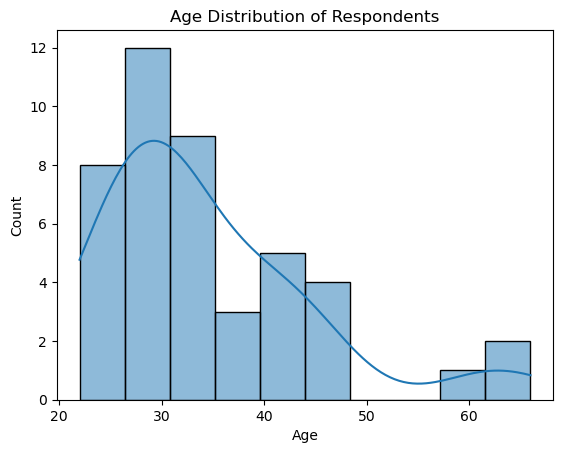

In [26]:
# Age Distribution
sns.histplot(cleaned_survey_data_with_omdb_tmdb['Age'], bins=10, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


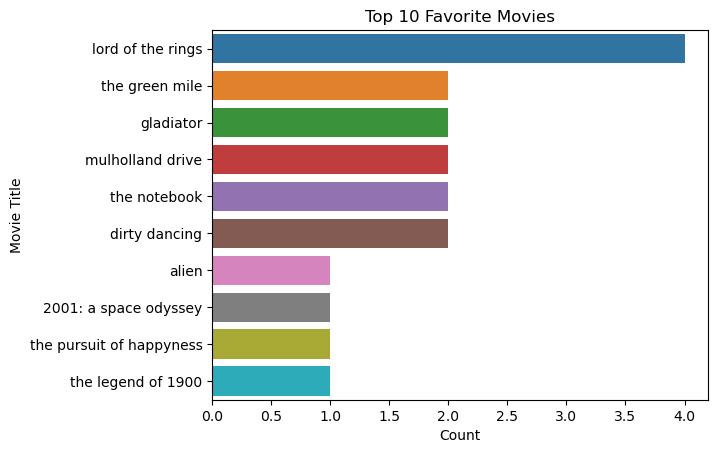

In [27]:
favorite_movies = cleaned_survey_data_with_omdb_tmdb['What is the title of your favorite movie ?'].value_counts().head(10)
sns.barplot(x=favorite_movies.values, y=favorite_movies.index)
plt.title('Top 10 Favorite Movies')
plt.xlabel('Count')
plt.ylabel('Movie Title')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


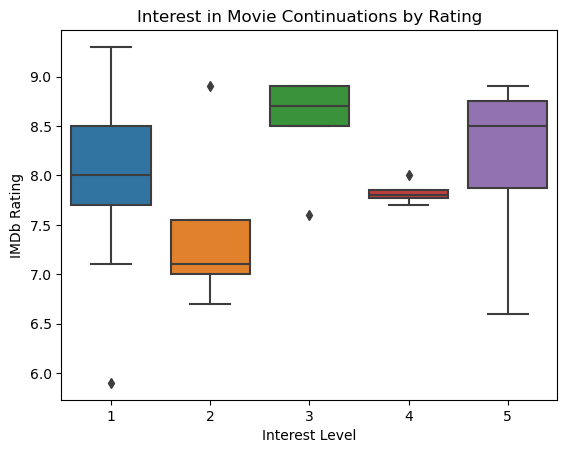

In [28]:
# Rename the column for easier handling
cleaned_survey_data_with_omdb_tmdb = cleaned_survey_data_with_omdb_tmdb.rename(columns={
    'On a scale of 1-5, how interested would you be in having a continuation to your favorite movie ?': 'Interest_in_Continuation'
})

# Create the boxplot
sns.boxplot(x='Interest_in_Continuation', y='imdbRating', data=cleaned_survey_data_with_omdb_tmdb)
plt.title('Interest in Movie Continuations by Rating')
plt.xlabel('Interest Level')
plt.ylabel('IMDb Rating')
plt.show()

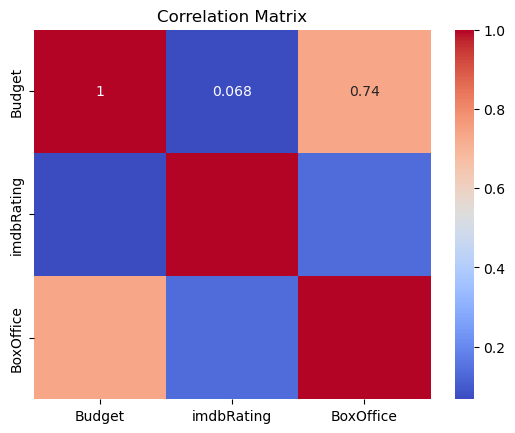

In [29]:
# correlation heatmap
correlation_matrix = cleaned_survey_data_with_omdb_tmdb[['Budget', 'imdbRating', 'BoxOffice']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


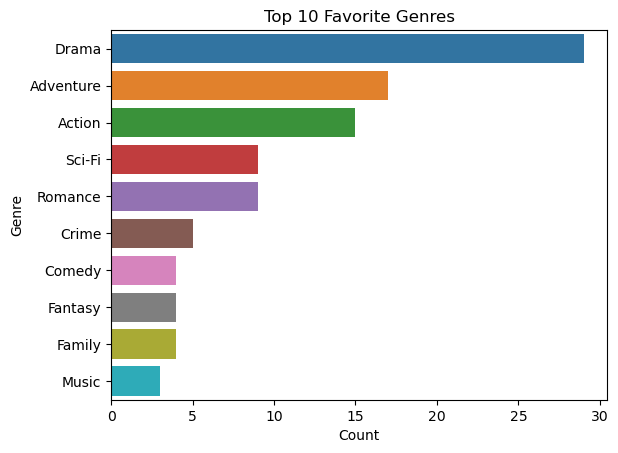

In [30]:
# Split genre column into individual genres and count occurrences
genres = cleaned_survey_data_with_omdb_tmdb['Genre'].dropna().str.split(',').tolist()
genres_flat = [item.strip() for sublist in genres for item in sublist]
genre_counts = Counter(genres_flat)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

sns.barplot(x='Count', y='Genre', data=genre_df.head(10))
plt.title('Top 10 Favorite Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\elora\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\elora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

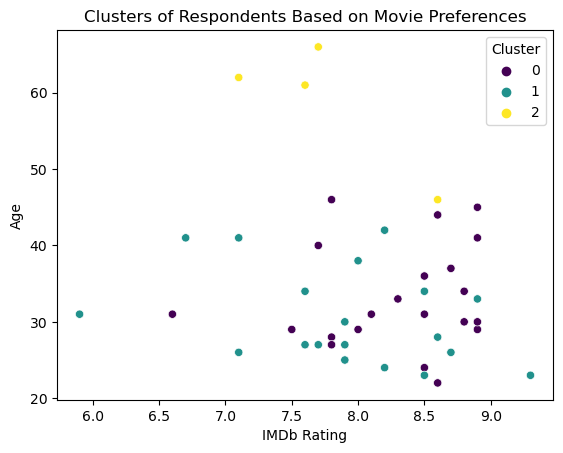

In [31]:
# Select relevant features for clustering
features = cleaned_survey_data_with_omdb_tmdb[['Age', 'imdbRating', 'Interest_in_Continuation']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
cleaned_survey_data_with_omdb_tmdb['Cluster'] = clusters

# Visualize the clusters
sns.scatterplot(x='imdbRating', y='Age', hue='Cluster', data=cleaned_survey_data_with_omdb_tmdb, palette='viridis')
plt.title('Clusters of Respondents Based on Movie Preferences')
plt.xlabel('IMDb Rating')
plt.ylabel('Age')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

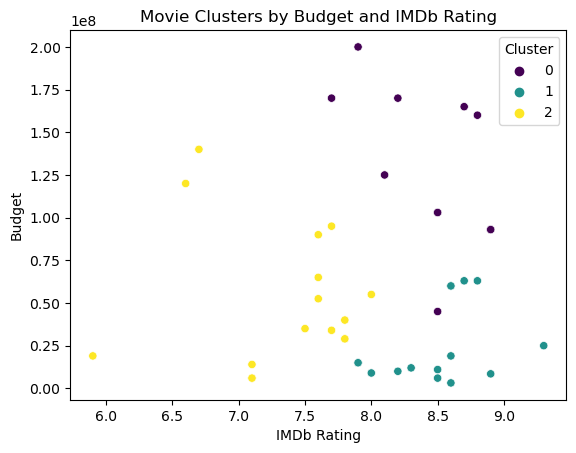

In [32]:
# Select relevant features for clustering
features = cleaned_survey_data_with_omdb_tmdb[['Budget', 'imdbRating', 'BoxOffice']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
cleaned_survey_data_with_omdb_tmdb['Cluster'] = clusters

# Visualize the clusters
sns.scatterplot(x='imdbRating', y='Budget', hue='Cluster', data=cleaned_survey_data_with_omdb_tmdb, palette='viridis')
plt.title('Movie Clusters by Budget and IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Budget')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

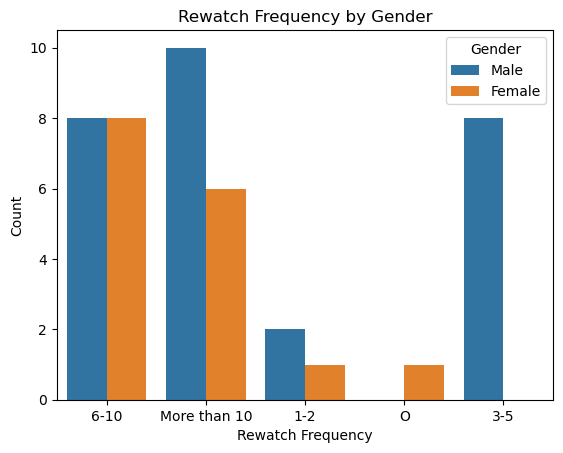

In [33]:
sns.countplot(x='How many times have you re-watched your favorite movie ?', hue='Gender', data=cleaned_survey_data_with_omdb_tmdb)
plt.title('Rewatch Frequency by Gender')
plt.xlabel('Rewatch Frequency')
plt.ylabel('Count')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


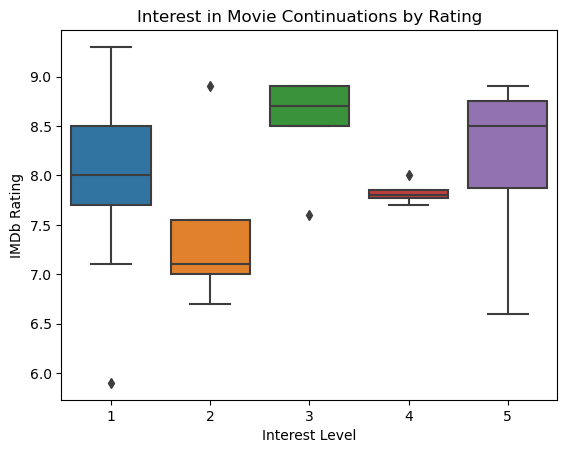

In [34]:
sns.boxplot(x='Interest_in_Continuation', y='imdbRating', data=cleaned_survey_data_with_omdb_tmdb)
plt.title('Interest in Movie Continuations by Rating')
plt.xlabel('Interest Level')
plt.ylabel('IMDb Rating')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


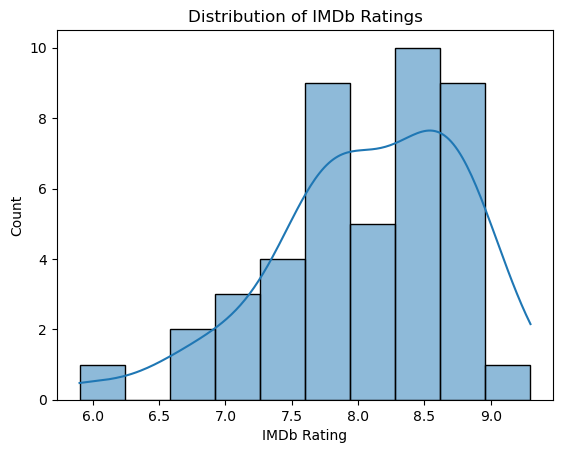

In [35]:
sns.histplot(cleaned_survey_data_with_omdb_tmdb['imdbRating'].dropna(), bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


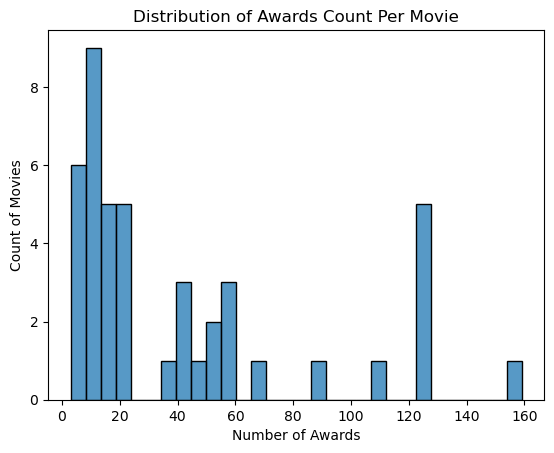

In [36]:
# Remove rows where 'Awards' is 'N/A' and convert 'Awards' to a numeric column
awards_movies = cleaned_survey_data_with_omdb_tmdb[cleaned_survey_data_with_omdb_tmdb['Awards'] != 'N/A']

# Assuming 'Awards' contains the number of awards won, convert it to integer
awards_movies['Awards'] = awards_movies['Awards'].astype(int)

# Plot the distribution of the number of awards
sns.histplot(awards_movies['Awards'], kde=False, bins=30)
plt.title('Distribution of Awards Count Per Movie')
plt.xlabel('Number of Awards')
plt.ylabel('Count of Movies')
plt.show()

In [37]:
"""
Most movies have fewer awards, with a significant number having fewer than 20 awards. 
A few outlier movies have an exceptionally high number of awards, around 120 to 160 awards, which skews the distribution. 
This is why there are tall bars at the lower end of the x-axis and smaller bars at the higher end.
"""

'\nMost movies have fewer awards, with a significant number having fewer than 20 awards. \nA few outlier movies have an exceptionally high number of awards, around 120 to 160 awards, which skews the distribution. \nThis is why there are tall bars at the lower end of the x-axis and smaller bars at the higher end.\n'

In [38]:
# Check if 'Genre' exists in the DataFrame
if 'Genre' in cleaned_survey_data_with_omdb_tmdb.columns:
    # Convert 'Genre' to dummy variables
    genre_dummies = cleaned_survey_data_with_omdb_tmdb['Genre'].str.get_dummies(sep=', ')
    cleaned_survey_data_with_omdb_tmdb = pd.concat([cleaned_survey_data_with_omdb_tmdb, genre_dummies], axis=1)

# Convert 'Director' and 'Actors' to dummy variables (use top 10 most frequent for simplicity)
top_directors = cleaned_survey_data_with_omdb_tmdb['Director'].value_counts().head(10).index
cleaned_survey_data_with_omdb_tmdb['top_director'] = cleaned_survey_data_with_omdb_tmdb['Director'].apply(lambda x: x if x in top_directors else 'Other')

top_actors = cleaned_survey_data_with_omdb_tmdb['Actors'].value_counts().head(10).index
cleaned_survey_data_with_omdb_tmdb['top_actors'] = cleaned_survey_data_with_omdb_tmdb['Actors'].apply(lambda x: x if x in top_actors else 'Other')

director_dummies = pd.get_dummies(cleaned_survey_data_with_omdb_tmdb['top_director'], prefix='Director')
actors_dummies = pd.get_dummies(cleaned_survey_data_with_omdb_tmdb['top_actors'], prefix='Actors')

cleaned_survey_data_with_omdb_tmdb = pd.concat([cleaned_survey_data_with_omdb_tmdb, director_dummies, actors_dummies], axis=1)

# Define the features and target variable
features = cleaned_survey_data_with_omdb_tmdb.drop(['imdbRating'], axis=1)
target = cleaned_survey_data_with_omdb_tmdb['imdbRating']

# Ensure all features for training are numeric
features = features.select_dtypes(include=['float64', 'int64', 'uint8'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

Mean Squared Error: 0.233452413927484
R-squared: 0.6836793989942088
                                              Feature    Importance
15                                            Fantasy  5.850428e-01
4   Rate the last movie you watched on a scale of 1-5  8.077699e-02
8                                           Adventure  2.672165e-02
5                                              Awards  1.102776e-02
17                                             Horror  4.996004e-15
6                                              Budget -6.563765e-09
2   How many years apart would you still consider ... -2.819151e-03
0                                                 Age -1.471134e-02
22                                             Sci-Fi -4.434092e-02
1                            Interest_in_Continuation -7.464477e-02


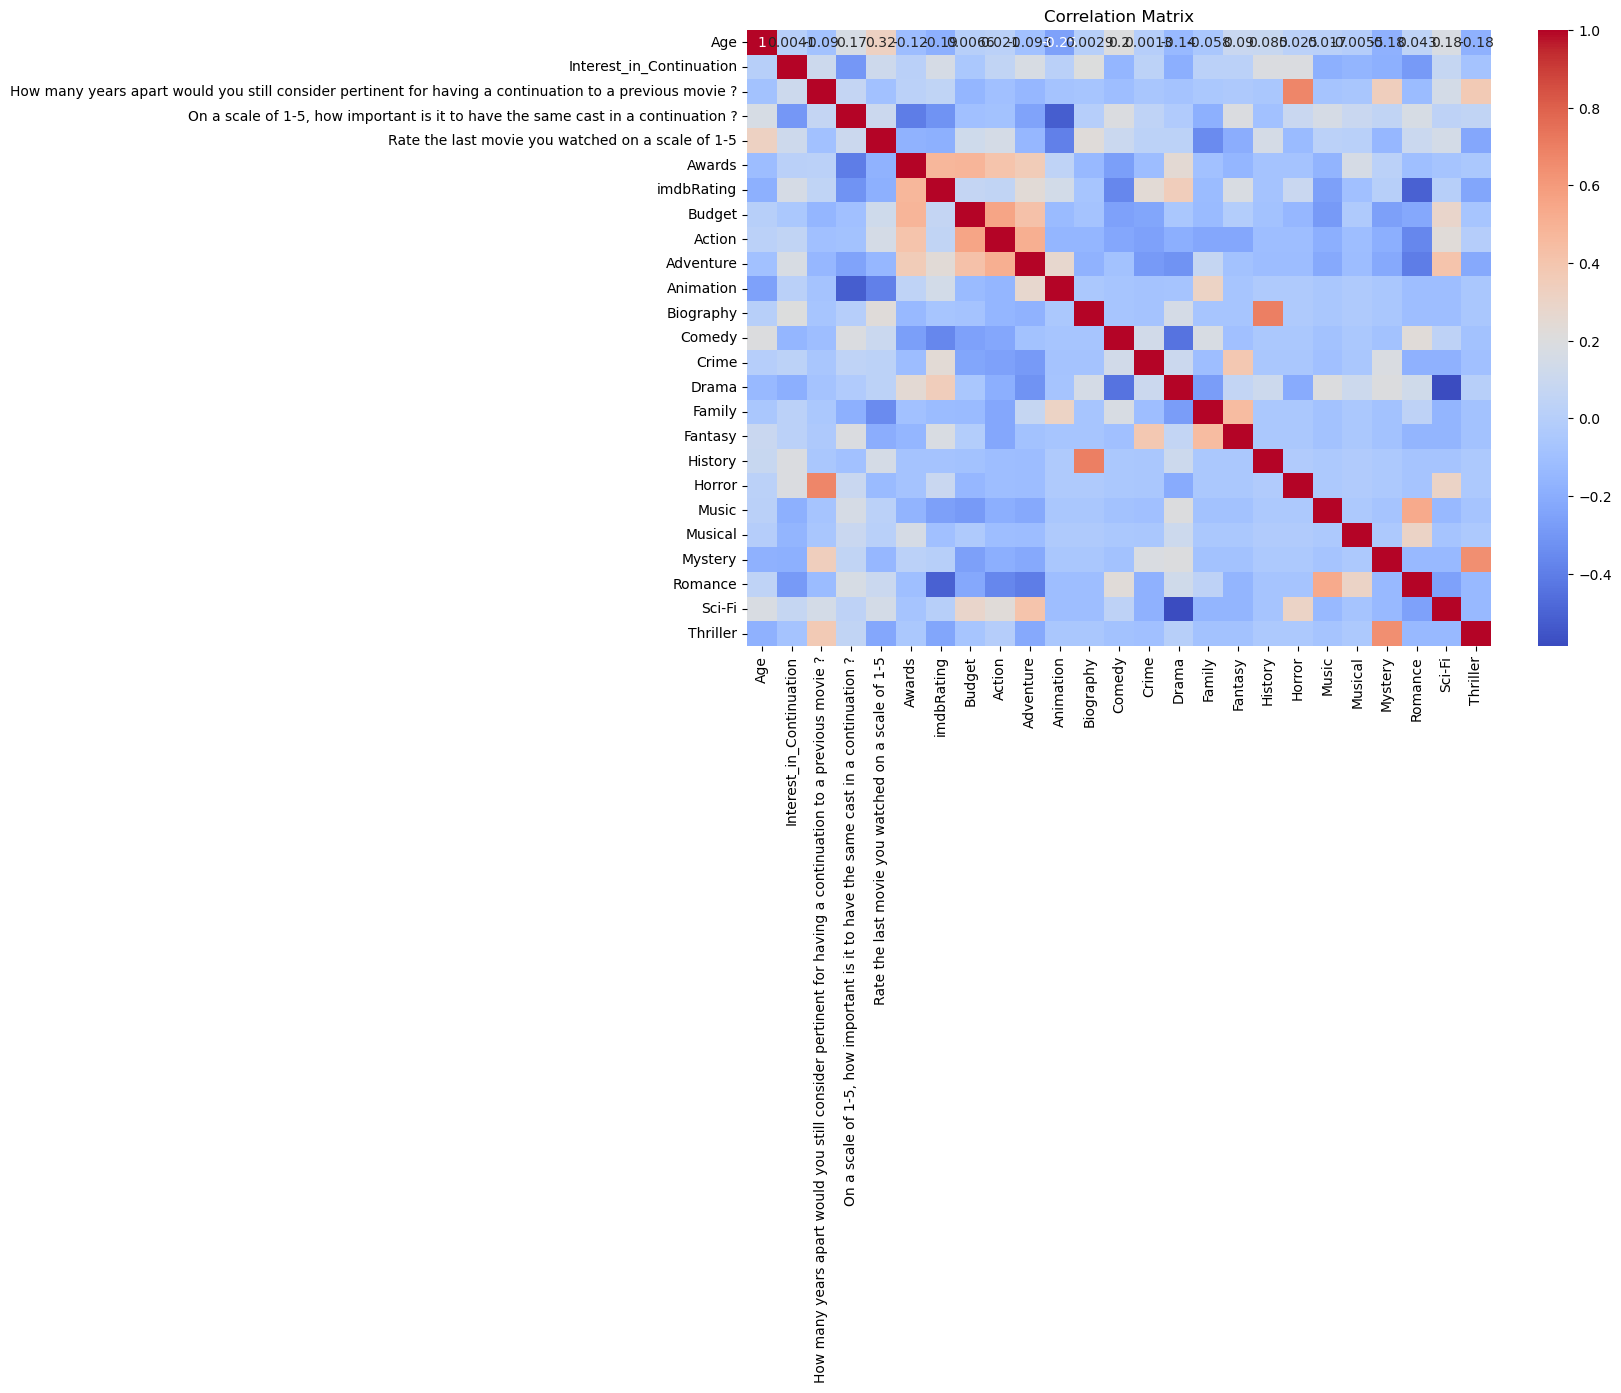

In [39]:
# Ensure all columns are numeric for correlation matrix
numeric_data = cleaned_survey_data_with_omdb_tmdb.select_dtypes(include=['float64', 'int64', 'uint8'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Top 10 Important Features for Predicting IMDb Ratings:
                                              Feature    Importance
15                                            Fantasy  5.850428e-01
4   Rate the last movie you watched on a scale of 1-5  8.077699e-02
8                                           Adventure  2.672165e-02
5                                              Awards  1.102776e-02
17                                             Horror  4.996004e-15
6                                              Budget -6.563765e-09
2   How many years apart would you still consider ... -2.819151e-03
0                                                 Age -1.471134e-02
22                                             Sci-Fi -4.434092e-02
1                            Interest_in_Continuation -7.464477e-02


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


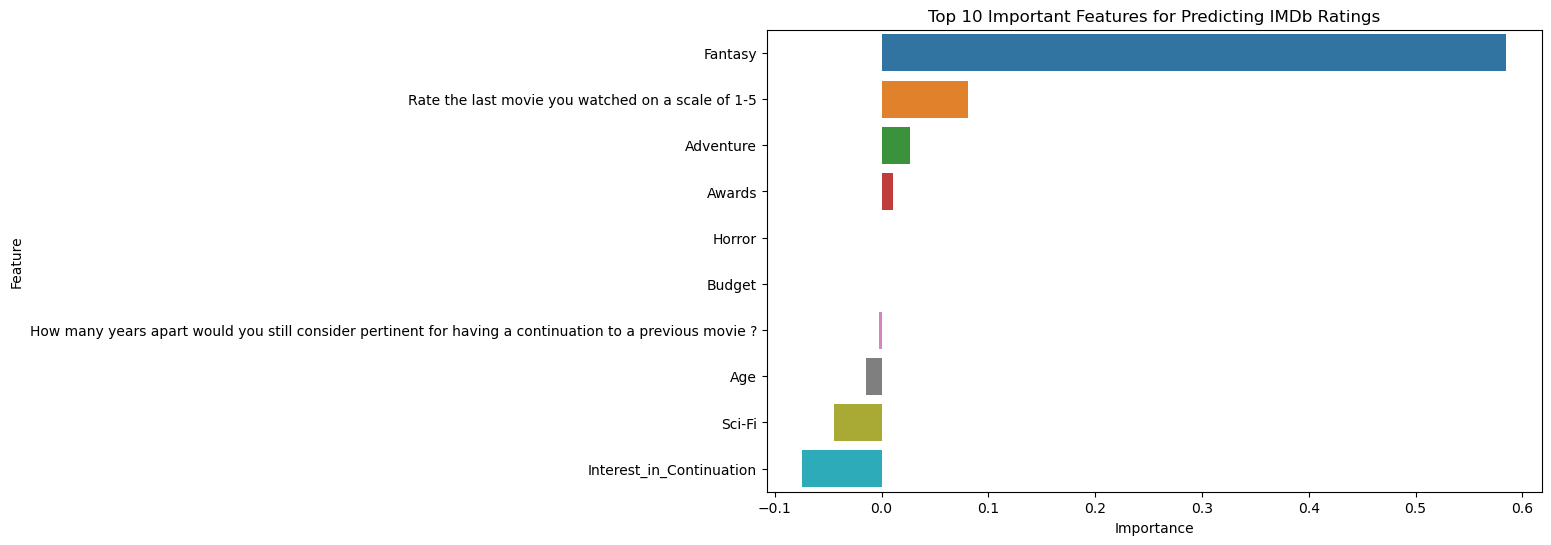

In [40]:
# Display top 10 important features
top_10_features = feature_importance.head(10)
print("Top 10 Important Features for Predicting IMDb Ratings:")
print(top_10_features)

# Bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Important Features for Predicting IMDb Ratings')
plt.show()

In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R-squared: {r2}')

Linear Regression Mean Squared Error: 0.233452413927484
Linear Regression R-squared: 0.6836793989942088


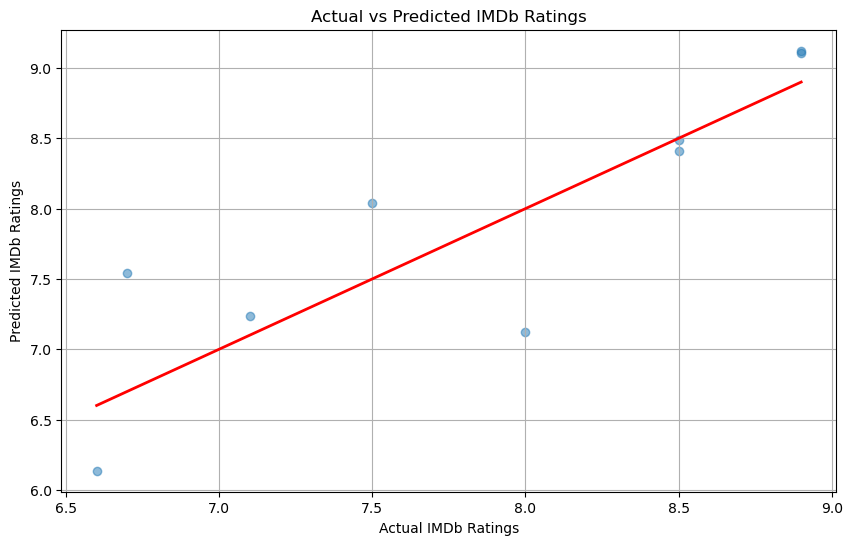

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


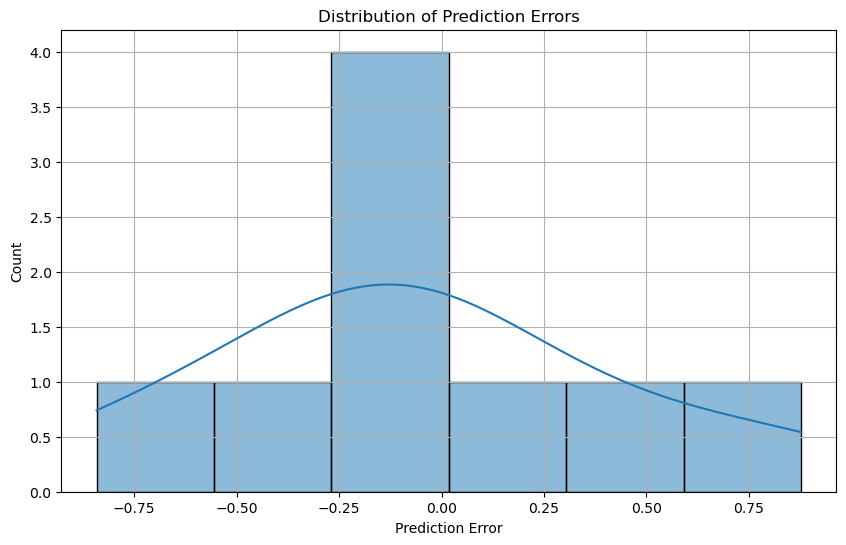

In [42]:
# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.title('Actual vs Predicted IMDb Ratings')
plt.grid(True)
plt.show()

# Distribution of errors
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

Random Forest Mean Squared Error: 0.5405297777777789
Random Forest R-squared: 0.26759933087989185
Top 10 Important Features for Random Forest:
                                              Feature  Importance
21                                            Romance    0.299846
5                                              Awards    0.192460
4   Rate the last movie you watched on a scale of 1-5    0.096111
0                                                 Age    0.074916
6                                              Budget    0.064207
14                                             Family    0.052815
2   How many years apart would you still consider ...    0.046922
11                                             Comedy    0.045414
1                            Interest_in_Continuation    0.022540
13                                              Drama    0.015601


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


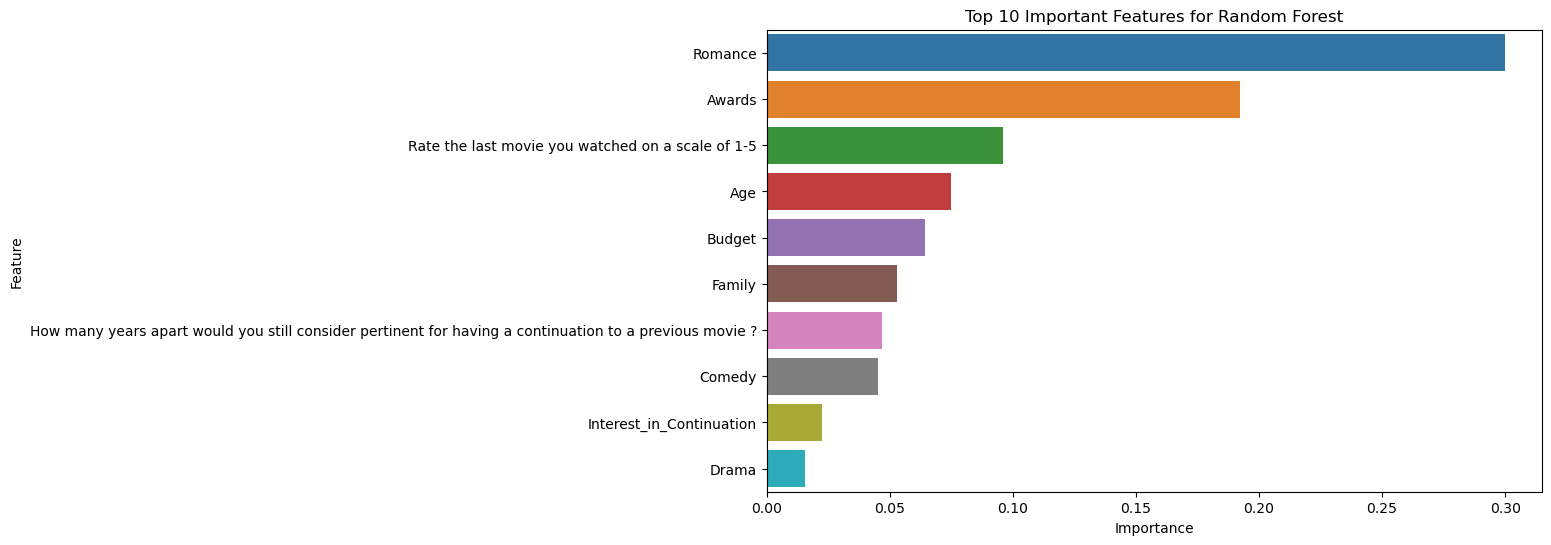

In [43]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Display top 10 important features for Random Forest
print("Top 10 Important Features for Random Forest:")
print(feature_importance_rf.head(10))

# Bar plot for Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(10))
plt.title('Top 10 Important Features for Random Forest')
plt.show()

In [44]:
cleaned_survey_data_with_omdb_tmdb

,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,Interest_in_Continuation,How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",...,"Actors_Gena Rowlands, James Garner, Rachel McAdams","Actors_Keir Dullea, Gary Lockwood, William Sylvester","Actors_Naomi Watts, Laura Harring, Justin Theroux",Actors_Other,"Actors_Patrick Swayze, Jennifer Grey, Jerry Orbach","Actors_Russell Crowe, Joaquin Phoenix, Connie Nielsen","Actors_Sigourney Weaver, Tom Skerritt, John Hurt","Actors_Tim Roth, Pruitt Taylor Vince, Mélanie Thierry","Actors_Tom Hanks, Michael Clarke Duncan, David Morse","Actors_Will Smith, Thandiwe Newton, Jaden Smith"
0,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,5,2,5,...,False,False,False,True,False,False,False,False,False,False
1,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,5,4,5,...,False,False,False,True,False,False,False,False,False,False
2,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,1,3,5,...,False,False,False,True,False,False,False,False,False,False
3,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,1,3,4,...,False,False,False,True,False,False,False,False,False,False
4,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,3,4,5,...,False,False,False,False,False,False,False,False,False,False
5,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,5,3,...,False,False,False,False,False,True,False,False,False,False
6,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,3,4,...,False,False,False,True,False,False,False,False,False,False
7,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,1,5,4,...,False,False,True,False,False,False,False,False,False,False
10,33,Male,France,lord of the rings,"Story, Acting, Soundtrack, Directing, Emotiona...","Happy, Sad, Scared, Inspired",More than 10,2,10,3,...,False,False,False,False,False,False,False,False,False,False
11,34,Female,France,moulin rouge!,"Story, Soundtrack, Emotional impact","Sad, Inspired",6-10,1,2,5,...,False,False,False,True,False,False,False,False,False,False


In [45]:
cleaned_survey_data_with_omdb_tmdb.shape

(44, 73)

In [46]:
cleaned_survey_data_with_omdb_tmdb.columns

Index(['Age', 'Gender', 'Country',
       'What is the title of your favorite movie ?',
       'What made you enjoy your favorite movie ? (Select all that apply)',
       'How did you favorite movie make you feel ? (Select all that apply)',
       'How many times have you re-watched your favorite movie ?',
       'Interest_in_Continuation',
       'How many years apart would you still consider pertinent for having a continuation to a previous movie ?',
       'On a scale of 1-5, how important is it to have the same cast in a continuation ?',
       'What is the title of the last movie you watched ?',
       'Rate the last movie you watched on a scale of 1-5',
       'Would you recommend the last movie you watched to others ?',
       'What genre of movies do you prefer ? (Select all that apply)',
       'What factors influence your decision to watch a movie ? (Select all that apply)',
       'Who are your favorite actors ?',
       'Who are your favorite movie directors ? ', 'Title', '

In [47]:
# List of columns to keep (modify this list based on your needs)
columns_to_keep = ['Age', 'Gender', 'Country',
       'What is the title of your favorite movie ?',
       'What made you enjoy your favorite movie ? (Select all that apply)',
       'How did you favorite movie make you feel ? (Select all that apply)',
       'How many times have you re-watched your favorite movie ?',
       'How many years apart would you still consider pertinent for having a continuation to a previous movie ?',
       'On a scale of 1-5, how important is it to have the same cast in a continuation ?',
       'What is the title of the last movie you watched ?',
       'Rate the last movie you watched on a scale of 1-5',
       'Would you recommend the last movie you watched to others ?',
       'What genre of movies do you prefer ? (Select all that apply)',
       'What factors influence your decision to watch a movie ? (Select all that apply)',
       'Who are your favorite actors ?',
       'Who are your favorite movie directors ? ', 'Title', 'Year', 'Released', 'Runtime',
       'Genre', 'Director', 'Actors', 'Language', 'Country_movie', 'Awards',
       'imdbRating', 'imdbVotes', 'BoxOffice', 'Budget']
# Select only the columns to keep
cleaned_survey_data_with_omdb_tmdb = cleaned_survey_data_with_omdb_tmdb[columns_to_keep]

# Display the first few rows of the cleaned dataframe
cleaned_survey_data_with_omdb_tmdb.head()

,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",What is the title of the last movie you watched ?,...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,2,5,Le Comte de Monte Cristo,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",12,8.8,2347815,37030102,63000000
1,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,4,5,John Wick 4,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,9,7.8,578298,119000002,40000000
2,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,3,5,I Don’t Remember,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4,8.2,915372,30328156,10000000
3,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,3,4,Am I Ok ?,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",44,8.7,2126853,188020017,165000000
4,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,4,5,Frantz,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",125,8.9,2026587,319372078,93000000


In [48]:
# Remove '.0' from all rows in the 'Year' column
cleaned_survey_data_with_omdb_tmdb['Year'] = cleaned_survey_data_with_omdb_tmdb['Year'].astype(int).astype(str)
cleaned_survey_data_with_omdb_tmdb['Year'].head(3)

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\2911906566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['Year'] = cleaned_survey_data_with_omdb_tmdb['Year'].astype(int).astype(str)


0    1999
1    1989
2    2000
Name: Year, dtype: object

In [49]:
cleaned_survey_data_with_omdb_tmdb['Year'].head(3)

0    1999
1    1989
2    2000
Name: Year, dtype: object

In [50]:
# Remove 'min' from all rows in the 'Runtime' column
cleaned_survey_data_with_omdb_tmdb['Runtime'] = cleaned_survey_data_with_omdb_tmdb['Runtime'].str.replace('min', '').str.strip()
cleaned_survey_data_with_omdb_tmdb['Runtime'].head(3)

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\1412924204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['Runtime'] = cleaned_survey_data_with_omdb_tmdb['Runtime'].str.replace('min', '').str.strip()


0    139
1    108
2    102
Name: Runtime, dtype: object

In [51]:
# Convert the 'imdbRating' column to string
cleaned_survey_data_with_omdb_tmdb['imdbRating'] = cleaned_survey_data_with_omdb_tmdb['imdbRating'].astype(str)

# Replace '.' with ',' in the 'imdbRating' column
cleaned_survey_data_with_omdb_tmdb['imdbRating'] = cleaned_survey_data_with_omdb_tmdb['imdbRating'].str.replace('.', ',')
cleaned_survey_data_with_omdb_tmdb['imdbRating'].head(3)

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\2880895574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['imdbRating'] = cleaned_survey_data_with_omdb_tmdb['imdbRating'].astype(str)
C:\Users\elora\AppData\Local\Temp\ipykernel_28556\2880895574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_survey_data_with_omdb_tmdb['imdbRating'] = cleaned_survey_data_with_omdb_tmdb['imdbRating'].str.replace('.', ',')


0    8,8
1    7,8
2    8,2
Name: imdbRating, dtype: object

In [52]:
# Retry saving the cleaned dataset
output_file_path = 'final_cleaned_data.csv'
cleaned_survey_data_with_omdb_tmdb.to_csv(output_file_path, index=False)

output_file_path

'final_cleaned_data.csv'

In [53]:
final_cleaned_data = pd.read_csv('final_cleaned_data.csv')
final_cleaned_data

,Age,Gender,Country,What is the title of your favorite movie ?,What made you enjoy your favorite movie ? (Select all that apply),How did you favorite movie make you feel ? (Select all that apply),How many times have you re-watched your favorite movie ?,How many years apart would you still consider pertinent for having a continuation to a previous movie ?,"On a scale of 1-5, how important is it to have the same cast in a continuation ?",What is the title of the last movie you watched ?,...,Genre,Director,Actors,Language,Country_movie,Awards,imdbRating,imdbVotes,BoxOffice,Budget
0,30,Male,France,fight club,"Story, Soundtrack, Script","Excited, Inspired",6-10,2,5,Le Comte de Monte Cristo,...,Drama,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",English,"Germany, United States",12,"8,8",2347815,37030102,63000000
1,46,Male,France,back to the future part ii,"Story, Acting, Special effects, Soundtrack, Di...","Happy, Excited, Amused",More than 10,4,5,John Wick 4,...,"Adventure, Comedy, Sci-Fi",Robert Zemeckis,"Michael J. Fox, Christopher Lloyd, Lea Thompson",English,United States,9,"7,8",578298,119000002,40000000
2,24,Male,France,snatch,"Story, Acting","Happy, Excited, Amused",More than 10,3,5,I Don’t Remember,...,"Comedy, Crime",Guy Ritchie,"Jason Statham, Brad Pitt, Stephen Graham","English, Russian","United Kingdom, United States",4,"8,2",915372,30328156,10000000
3,26,Female,Portugal,interstellar,"Story, Soundtrack, Directing, Plot twists",Intrigued,1-2,3,4,Am I Ok ?,...,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",English,"United States, United Kingdom, Canada",44,"8,7",2126853,188020017,165000000
4,29,Male,France,lord of the rings,"Story, Soundtrack, Cinematography, Emotional i...","Sad, Excited, Inspired",6-10,4,5,Frantz,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",125,"8,9",2026587,319372078,93000000
5,24,Male,France,gladiator,"Story, Acting, Soundtrack, Cinematography, Scr...","Happy, Excited, Inspired",6-10,5,3,Man of fire,...,"Action, Adventure, Drama",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",English,"United States, United Kingdom, Malta, Morocco",60,"8,5",1636382,187705427,103000000
6,37,Male,France,the matrix,"Story, Special effects, Soundtrack, Cinematogr...","Happy, Excited, Intrigued",More than 10,3,4,Inside Out 2,...,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",English,"United States, Australia",42,"8,7",2070350,172076928,63000000
7,27,Female,France,mulholland drive,"Story, Acting, Cinematography, Directing, Scri...",Intrigued,O,5,4,A Family Affair,...,"Drama, Mystery, Thriller",David Lynch,"Naomi Watts, Laura Harring, Justin Theroux","English, Spanish, French","France, United States",50,"7,9",386765,7220243,15000000
8,33,Male,France,lord of the rings,"Story, Acting, Soundtrack, Directing, Emotiona...","Happy, Sad, Scared, Inspired",More than 10,10,3,Bac Nord,...,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom","English, Sindarin","New Zealand, United States",125,"8,9",2026587,319372078,93000000
9,34,Female,France,moulin rouge!,"Story, Soundtrack, Emotional impact","Sad, Inspired",6-10,2,5,Le Comte de Monte Cristo,...,"Drama, Musical, Romance",Baz Luhrmann,"Nicole Kidman, Ewan McGregor, John Leguizamo","English, French, Spanish","Australia, United States",87,"7,6",301120,57386607,52500000


In [54]:
final_cleaned_data.shape

(44, 30)

In [55]:
final_cleaned_data.columns

Index(['Age', 'Gender', 'Country',
       'What is the title of your favorite movie ?',
       'What made you enjoy your favorite movie ? (Select all that apply)',
       'How did you favorite movie make you feel ? (Select all that apply)',
       'How many times have you re-watched your favorite movie ?',
       'How many years apart would you still consider pertinent for having a continuation to a previous movie ?',
       'On a scale of 1-5, how important is it to have the same cast in a continuation ?',
       'What is the title of the last movie you watched ?',
       'Rate the last movie you watched on a scale of 1-5',
       'Would you recommend the last movie you watched to others ?',
       'What genre of movies do you prefer ? (Select all that apply)',
       'What factors influence your decision to watch a movie ? (Select all that apply)',
       'Who are your favorite actors ?',
       'Who are your favorite movie directors ? ', 'Title', 'Year', 'Released',
       'Runtime'

# DESCRIPTIVE STATS

In [56]:
# Descriptive statistics for key variables
descriptive_stats = final_cleaned_data[['imdbRating', 'BoxOffice', 'Budget', 'Awards', 'Runtime']].describe()
descriptive_stats

,BoxOffice,Budget,Awards,Runtime
count,4.400000e+01,4.400000e+01,44.000000,44.000000
mean,1.668138e+08,6.414045e+07,42.090909,140.204545
std,1.616801e+08,5.448164e+07,42.818610,28.852133
min,1.674350e+05,3.180000e+06,3.000000,88.000000
25%,5.589950e+07,1.500000e+07,12.000000,122.000000
50%,1.279007e+08,5.375000e+07,19.000000,136.000000
75%,2.208241e+08,9.350000e+07,58.500000,155.000000
max,7.187328e+08,2.000000e+08,159.000000,202.000000


# Correlation Matrix

In [57]:
# Correcting the format for IMDb ratings by replacing commas with dots and converting to float
final_cleaned_data['imdbRating'] = final_cleaned_data['imdbRating'].str.replace(',', '.').astype(float)

In [58]:
# Correlation matrix
correlation_matrix = final_cleaned_data[['imdbRating', 'BoxOffice', 'Budget', 'Awards', 'Runtime']].corr()
correlation_matrix

,imdbRating,BoxOffice,Budget,Awards,Runtime
imdbRating,1.000000,0.134111,0.067537,0.476159,0.423157
BoxOffice,0.134111,1.000000,0.736708,0.602639,0.228230
Budget,0.067537,0.736708,1.000000,0.482289,0.392848
Awards,0.476159,0.602639,0.482289,1.000000,0.456194
Runtime,0.423157,0.228230,0.392848,0.456194,1.000000


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


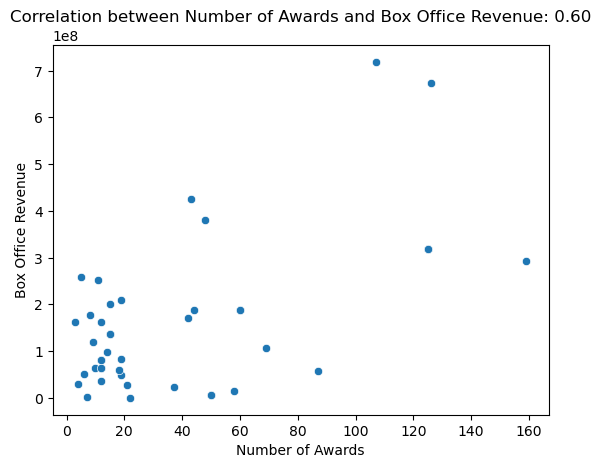

0.6026386126915624

In [59]:
# Calculate the correlation
correlation_awards_box_office = final_cleaned_data['Awards'].corr(final_cleaned_data['BoxOffice'])

# Scatter plot with a trend line
sns.scatterplot(x='Awards', y='BoxOffice', data=final_cleaned_data)
plt.title(f'Correlation between Number of Awards and Box Office Revenue: {correlation_awards_box_office:.2f}')
plt.xlabel('Number of Awards')
plt.ylabel('Box Office Revenue')
plt.show()

correlation_awards_box_office

# Hypotheses

In [60]:
"""
Hypothesis 1 : Movies with higher budgets tend to have higher IMDb ratings.
Null Hypothesis (H0): There is no significant relationship between the budget of a movie and its IMDb rating.
Alternative Hypothesis (H1): There is a significant positive relationship between the budget of a movie and its IMDb rating.

Hypothesis 2 : Movies with higher budgets generate higher box office revenues.
Null Hypothesis (H0): There is no significant relationship between the budget of a movie and its box office revenue.
Alternative Hypothesis (H2): There is a significant positive relationship between the budget of a movie and its box office revenue.

Hypothesis 3 : Certain genres are associated with higher box office revenues.
Null Hypothesis (H0): There is no significant difference in box office revenues between different genres.
Alternative Hypothesis (H3): There is a significant difference in box office revenues between different genres.

Hypothesis 4 : Movies released in more recent years have higher IMDb ratings.
Null Hypothesis (H0): There is no significant relationship between the release year of a movie and its IMDb rating.
Alternative Hypothesis (H4): There is a significant positive relationship between the release year of a movie and its IMDb rating.

Hypothesis 5 : Longer movies tend to have higher IMDb ratings.
Null Hypothesis (H0): There is no significant relationship between the runtime of a movie and its IMDb rating.
Alternative Hypothesis (H6): There is a significant positive relationship between the runtime of a movie and its IMDb rating.

Hypothesis 6 : Movies featuring high-profile actors tend to achieve higher box office earnings and IMDb ratings.
Null Hypothesis (H0): The presence of high-profile actors does not significantly impact box office revenue and IMDB ratings.
Alternative Hypothesis (H1): The presence of high-profile actors significantly impacts box office revenue and IMDB ratings.

Hypothesis 7 : Movies directed by acclaimed directors are associated with higher box office earnings and IMDb ratings.
Null Hypothesis (H0): The presence of acclaimed directors does not significantly impact box office revenue and IMDB ratings.
Alternative Hypothesis (H1): The presence of acclaimed directors significantly impacts box office revenue and IMDB ratings.

Hypothesis 8 : Movies released during peak seasons like summer or holidays tend to perform better due to higher audience turnout.
Null Hypothesis (H0): There is no significant difference in box office performance between movies released during peak seasons (summer or holidays) and other times.
Alternative Hypothesis (H1): Movies released during peak seasons (summer or holidays) perform better at the box office than those released at other times.
"""

'\nHypothesis 1 : Movies with higher budgets tend to have higher IMDb ratings.\nNull Hypothesis (H0): There is no significant relationship between the budget of a movie and its IMDb rating.\nAlternative Hypothesis (H1): There is a significant positive relationship between the budget of a movie and its IMDb rating.\n\nHypothesis 2 : Movies with higher budgets generate higher box office revenues.\nNull Hypothesis (H0): There is no significant relationship between the budget of a movie and its box office revenue.\nAlternative Hypothesis (H2): There is a significant positive relationship between the budget of a movie and its box office revenue.\n\nHypothesis 3 : Certain genres are associated with higher box office revenues.\nNull Hypothesis (H0): There is no significant difference in box office revenues between different genres.\nAlternative Hypothesis (H3): There is a significant difference in box office revenues between different genres.\n\nHypothesis 4 : Movies released in more recent y

# Hypothesis 1 : Movies with higher budgets tend to have higher IMDb ratings.

In [61]:
# Prepare the data for regression
X = final_cleaned_data['Budget']
y_imdb = final_cleaned_data['imdbRating']
y_box_office = final_cleaned_data['BoxOffice']

# Add a constant to the independent variable (Budget)
X = sm.add_constant(X)

# Regression model for IMDb ratings
model_imdb = sm.OLS(y_imdb, X).fit()
print("IMDb Rating vs Budget")
print(model_imdb.summary())

IMDb Rating vs Budget
                            OLS Regression Results                            
Dep. Variable:             imdbRating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1925
Date:                Fri, 26 Jul 2024   Prob (F-statistic):              0.663
Time:                        14:43:37   Log-Likelihood:                -47.314
No. Observations:                  44   AIC:                             98.63
Df Residuals:                      42   BIC:                             102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0224      0.1

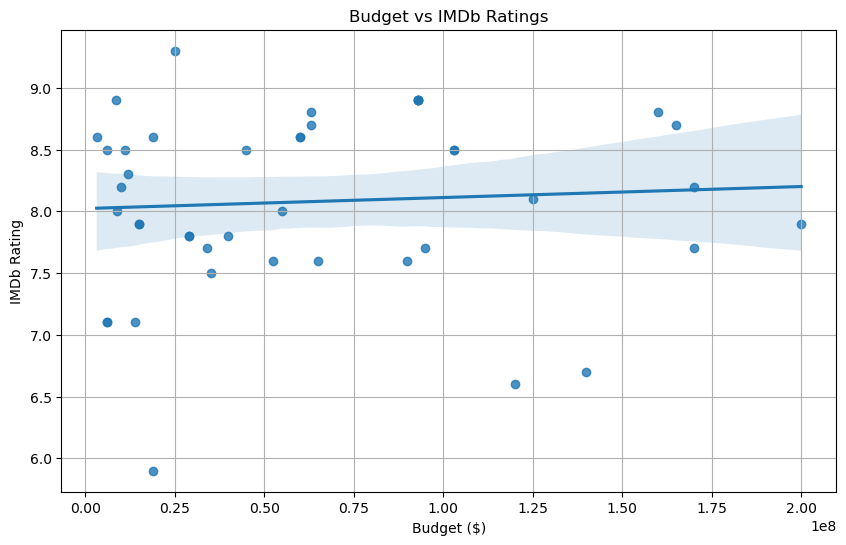

In [62]:
# Scatter plot with regression line for Budget vs IMDb Ratings
plt.figure(figsize=(10, 6))
sns.regplot(x='Budget', y='imdbRating', data=final_cleaned_data)
plt.title('Budget vs IMDb Ratings')
plt.xlabel('Budget ($)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

In [63]:
"""
R-squared: 0.005
This indicates that only 0.5% of the variance in IMDb ratings is explained by the budget, suggesting a very weak relationship.
Adj. R-squared: -0.019
The negative adjusted R-squared indicates that the model does not explain the variability of the response data around its mean. This suggests the model might fit the data poorly.
F-statistic: 0.1925, Prob (F-statistic): 0.663
The F-statistic is low and the p-value (0.663) is much higher than 0.05, indicating that the budget is not a statistically significant predictor of IMDb ratings at a 95% confidence level.
Coefficient for Budget: This coefficient is extremely close to zero, further indicating a negligible relationship between budget and IMDb rating.
P-value for Budget: 0.663
This high p-value suggests that the budget is not a statistically significant predictor of IMDb ratings.
Conclusion:
The analysis shows that there is no significant relationship between the budget of a movie and its IMDb rating. The model explains almost none of the variability in IMDb ratings, and the budget variable is not statistically significant.

For IMDb Rating vs Budget: The budget does not significantly predict IMDb ratings, as the relationship is weak and not statistically significant.
"""

'\nR-squared: 0.005\nThis indicates that only 0.5% of the variance in IMDb ratings is explained by the budget, suggesting a very weak relationship.\nAdj. R-squared: -0.019\nThe negative adjusted R-squared indicates that the model does not explain the variability of the response data around its mean. This suggests the model might fit the data poorly.\nF-statistic: 0.1925, Prob (F-statistic): 0.663\nThe F-statistic is low and the p-value (0.663) is much higher than 0.05, indicating that the budget is not a statistically significant predictor of IMDb ratings at a 95% confidence level.\nCoefficient for Budget: This coefficient is extremely close to zero, further indicating a negligible relationship between budget and IMDb rating.\nP-value for Budget: 0.663\nThis high p-value suggests that the budget is not a statistically significant predictor of IMDb ratings.\nConclusion:\nThe analysis shows that there is no significant relationship between the budget of a movie and its IMDb rating. The m

# Hypothesis 2 : Movies with higher budgets generate higher box office revenues.

In [64]:
# Regression model for Box Office revenue
model_box_office = sm.OLS(y_box_office, X).fit()
print("\nBox Office Revenue vs Budget")
print(model_box_office.summary())


Box Office Revenue vs Budget
                            OLS Regression Results                            
Dep. Variable:              BoxOffice   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     49.85
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.19e-08
Time:                        14:43:38   Log-Likelihood:                -876.36
No. Observations:                  44   AIC:                             1757.
Df Residuals:                      42   BIC:                             1760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.659e+07 

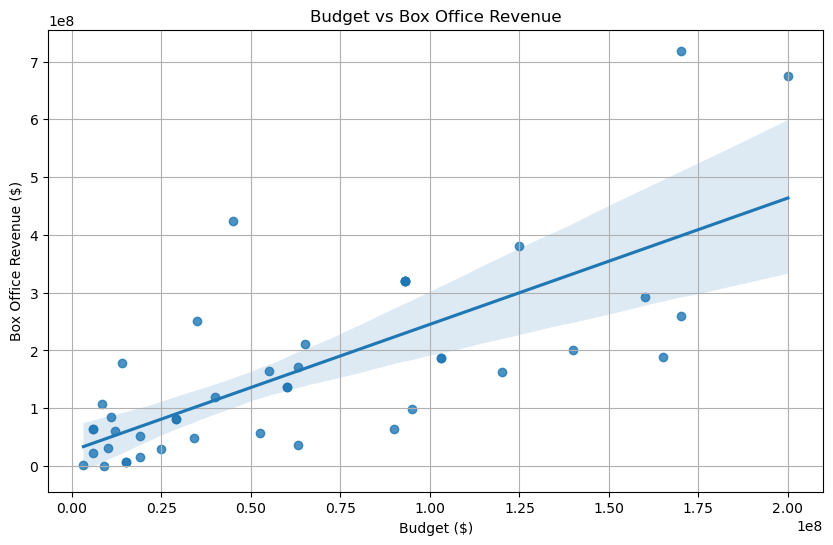

In [65]:
# Scatter plot with regression line for Budget vs Box Office Revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='Budget', y='BoxOffice', data=final_cleaned_data)
plt.title('Budget vs Box Office Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Box Office Revenue ($)')
plt.grid(True)
plt.show()

In [66]:
"""
R-squared: 0.543
This indicates that 54.3% of the variance in box office revenue is explained by the budget, suggesting a moderate relationship.
Adj. R-squared: 0.532
The adjusted R-squared is close to the R-squared value, indicating a good fit for the model considering the number of predictors.
F-statistic: 49.85, Prob (F-statistic): The F-statistic is high and the p-value is extremely low (much less than 0.05), indicating that the model is statistically significant overall.
Coefficient for Budget: 2.1863
This coefficient suggests that for every unit increase in budget (presumably in the same units as the dependent variable, BoxOffice), the box office revenue increases by 2.1863 units.
P-value for Budget: The very low p-value indicates that the budget is a statistically significant predictor of box office revenue.
Conclusion:
The analysis demonstrates a statistically significant positive relationship between the budget of a movie and its box office revenue. The model explains a substantial portion of the variability in box office revenue.

For Box Office Revenue vs Budget: There is a significant positive relationship between budget and box office revenue, suggesting that higher budgets are associated with higher 
"""

'\nR-squared: 0.543\nThis indicates that 54.3% of the variance in box office revenue is explained by the budget, suggesting a moderate relationship.\nAdj. R-squared: 0.532\nThe adjusted R-squared is close to the R-squared value, indicating a good fit for the model considering the number of predictors.\nF-statistic: 49.85, Prob (F-statistic): The F-statistic is high and the p-value is extremely low (much less than 0.05), indicating that the model is statistically significant overall.\nCoefficient for Budget: 2.1863\nThis coefficient suggests that for every unit increase in budget (presumably in the same units as the dependent variable, BoxOffice), the box office revenue increases by 2.1863 units.\nP-value for Budget: The very low p-value indicates that the budget is a statistically significant predictor of box office revenue.\nConclusion:\nThe analysis demonstrates a statistically significant positive relationship between the budget of a movie and its box office revenue. The model expla

# Hypothesis 3 : Certain genres are associated with higher box office revenues.

In [67]:
# Grouping box office revenue by genres
grouped = final_cleaned_data.groupby('Genre')['BoxOffice'].apply(list)

# Prepare data for ANOVA test
genre_boxoffice = [group for group in grouped]

# ANOVA Test
anova_result = stats.f_oneway(*genre_boxoffice)

print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA test result: F-statistic = 1.0843903534994226, p-value = 0.44038464385147136


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


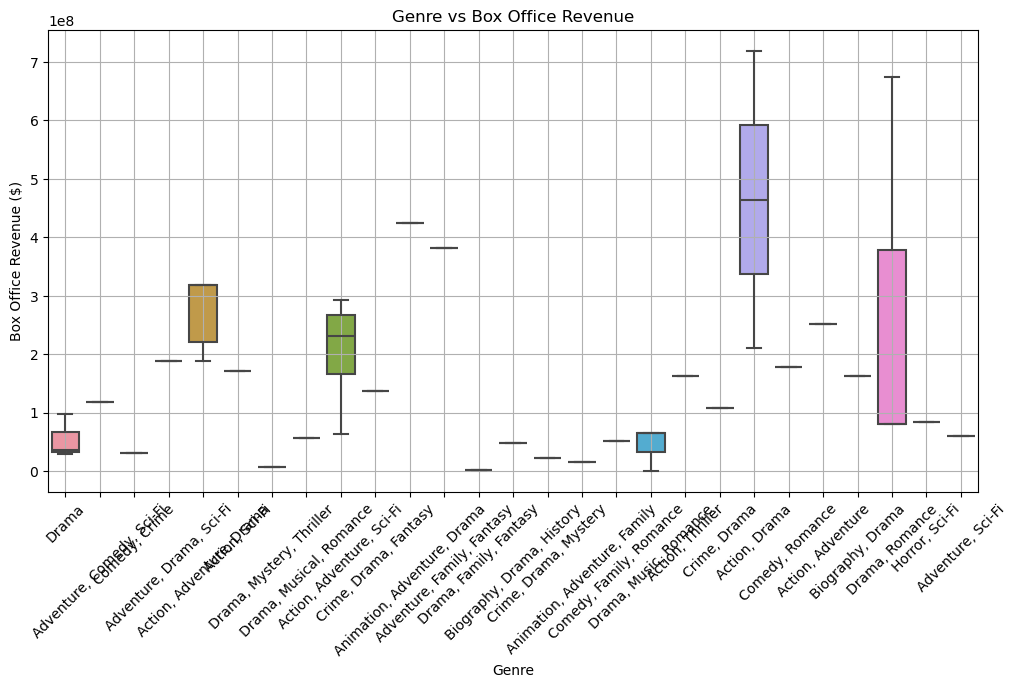

In [68]:
# Box plot for Genre vs Box Office Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='BoxOffice', data=final_cleaned_data)
plt.title('Genre vs Box Office Revenue')
plt.xlabel('Genre')
plt.ylabel('Box Office Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [69]:
"""
The p-value of 0.440 is much higher than the typical significance level of 0.05. 
This means we do not have enough evidence to reject the null hypothesis. 
Therefore, we conclude that there is no statistically significant difference in box office revenues across different genres 
based on the available data.
"""

'\nThe p-value of 0.440 is much higher than the typical significance level of 0.05. \nThis means we do not have enough evidence to reject the null hypothesis. \nTherefore, we conclude that there is no statistically significant difference in box office revenues across different genres \nbased on the available data.\n'

In [70]:
# Prefix for cleaned genre names to avoid issues with variable naming
prefix = "G_"

# Clean genre names in the dataset
final_cleaned_data['Cleaned_Genre'] = final_cleaned_data['Genre'].apply(
    lambda x: prefix + x.replace(' ', '_').replace('-', '_').replace('&', 'and').replace(',', '_').replace('/', '_')
)

# Extract unique cleaned genres
unique_genres_cleaned = set(genre for sublist in final_cleaned_data['Cleaned_Genre'].str.split(', ') for genre in sublist)

# Initialize dictionary to store results
anova_results_cleaned = {}

# Loop over each genre
for genre in unique_genres_cleaned:
    # Create a binary column for the genre
    final_cleaned_data[genre] = final_cleaned_data['Cleaned_Genre'].apply(lambda x: 1 if genre in x else 0)
    
    # Define the model
    model = ols('BoxOffice ~ C({})'.format(genre), data=final_cleaned_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Extract the relevant results
    f_statistic = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]
    
    anova_results_cleaned[genre] = (f_statistic, p_value)

anova_results_cleaned

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\4007955446.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_table['F'][0]
C:\Users\elora\AppData\Local\Temp\ipykernel_28556\4007955446.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\elora\AppData\Local\Temp\ipykernel_28556\4007955446.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_table

C:\Users\elora\AppData\Local\Temp\ipykernel_28556\4007955446.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_table['F'][0]
C:\Users\elora\AppData\Local\Temp\ipykernel_28556\4007955446.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\elora\AppData\Local\Temp\ipykernel_28556\4007955446.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_table

{'G_Animation__Adventure__Family': (0.8975945872440569, 0.34884697541867393),
 'G_Adventure__Comedy__Sci_Fi': (0.08759167310374788, 0.7687199018980466),
 'G_Adventure__Sci_Fi': (0.4367949810454655, 0.5122826101102416),
 'G_Crime__Drama': (0.7195248022504346, 0.40110838539889837),
 'G_Drama__Romance': (1.5718903048133257, 0.21686666522539888),
 'G_Drama__Family__Fantasy': (1.071764710901216, 0.3064713943942883),
 'G_Crime__Drama__Mystery': (0.8020527186513431, 0.3755845998338033),
 'G_Action__Adventure__Sci_Fi': (0.2340294372432847, 0.6310648478768017),
 'G_Action__Adventure': (3.8947714326363014, 0.05503978881088782),
 'G_Comedy__Romance': (0.005138769771231771, 0.9431927017759282),
 'G_Action__Adventure__Drama': (3.3068745229239265, 0.07612651245005009),
 'G_Drama__Mystery__Thriller': (2.093419551898278, 0.15535738844431252),
 'G_Action__Drama': (8.322630480886, 0.006154523874707275),
 'G_Adventure__Drama__Sci_Fi': (0.017201149705805475, 0.8962803831123336),
 'G_Drama': (4.17256744002

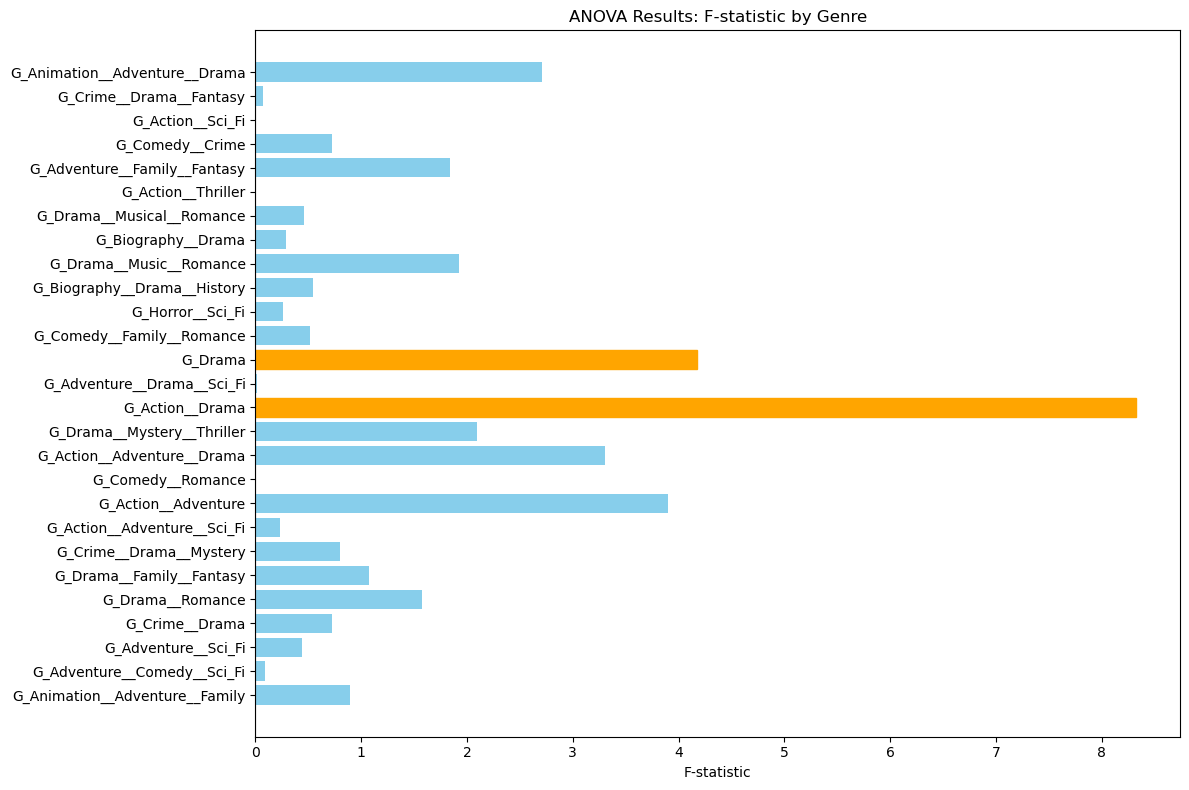

In [71]:
# Extract data for plotting
genres = list(anova_results_cleaned.keys())
f_values = [anova_results_cleaned[genre][0] for genre in genres]
p_values = [anova_results_cleaned[genre][1] for genre in genres]

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(genres, f_values, color='skyblue')
plt.xlabel('F-statistic')
plt.title('ANOVA Results: F-statistic by Genre')

# Highlight bars with significant results
for bar, p_value in zip(bars, p_values):
    if p_value < 0.05:
        bar.set_color('orange')

plt.axvline(x=0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()

In [72]:
"""
Significant Genres:
G_Action__Drama: This genre has an F-statistic of 8.32 and a p-value of 0.006, indicating a statistically significant 
difference in box office revenue compared to other genres at a 0.05 significance level.
G_Drama: With a p-value of 0.047, this genre also shows a significant difference in box office performance.

Not Significant but Noteworthy:
G_Action__Adventure: This genre has a p-value of 0.055, which is slightly above the typical 0.05 threshold, 
suggesting a potential impact that may warrant further exploration.

Non-Significant Genres:
Most other genres, including G_Crime__Drama, G_Comedy__Romance, and G_Adventure__Sci_Fi, have p-values well above 0.05, 
indicating that there's no statistically significant difference in box office revenues for movies in these genres compared 
to others.
"""

"\nSignificant Genres:\nG_Action__Drama: This genre has an F-statistic of 8.32 and a p-value of 0.006, indicating a statistically significant \ndifference in box office revenue compared to other genres at a 0.05 significance level.\nG_Drama: With a p-value of 0.047, this genre also shows a significant difference in box office performance.\n\nNot Significant but Noteworthy:\nG_Action__Adventure: This genre has a p-value of 0.055, which is slightly above the typical 0.05 threshold, \nsuggesting a potential impact that may warrant further exploration.\n\nNon-Significant Genres:\nMost other genres, including G_Crime__Drama, G_Comedy__Romance, and G_Adventure__Sci_Fi, have p-values well above 0.05, \nindicating that there's no statistically significant difference in box office revenues for movies in these genres compared \nto others.\n"

# Hypothesis 4 : Movies released in more recent years have higher IMDb ratings.

In [73]:
# Correlation Test
pearson_corr, pearson_p = pearsonr(final_cleaned_data['Year'], final_cleaned_data['imdbRating'])
spearman_corr, spearman_p = spearmanr(final_cleaned_data['Year'], final_cleaned_data['imdbRating'])

print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

# Linear Regression
X_year = sm.add_constant(final_cleaned_data['Year'])
y_imdb = final_cleaned_data['imdbRating']
model_year_imdb = sm.OLS(y_imdb, X_year).fit()

print(model_year_imdb.summary())

Pearson correlation: -0.06838373658131264, p-value: 0.6591661066220162
Spearman correlation: 0.05511816029943333, p-value: 0.7223218083169777
                            OLS Regression Results                            
Dep. Variable:             imdbRating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1973
Date:                Fri, 26 Jul 2024   Prob (F-statistic):              0.659
Time:                        14:43:40   Log-Likelihood:                -47.311
No. Observations:                  44   AIC:                             98.62
Df Residuals:                      42   BIC:                             102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

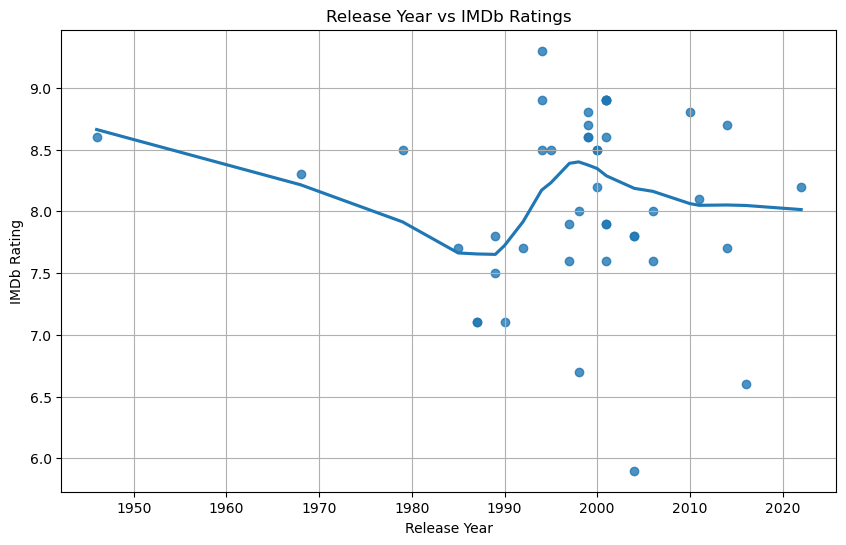

In [74]:
# Scatter plot with trend line for Release Year vs IMDb Ratings
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='imdbRating', data=final_cleaned_data, lowess=True)
plt.title('Release Year vs IMDb Ratings')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

In [75]:
"""
Both the Pearson and Spearman correlation tests show very low correlation coefficients and high p-values (greater than 0.05), 
indicating no significant relationship between the release year and IMDb ratings. The OLS regression model also shows an 
R-squared value of 0.005, suggesting that the release year explains only 0.5% of the variance in IMDb ratings. The p-value for 
the year coefficient in the regression is 0.659, which is not statistically significant. Thus, we fail to reject the null 
hypothesis and conclude that there is no significant relationship between the release year and IMDb ratings.
"""

'\nBoth the Pearson and Spearman correlation tests show very low correlation coefficients and high p-values (greater than 0.05), \nindicating no significant relationship between the release year and IMDb ratings. The OLS regression model also shows an \nR-squared value of 0.005, suggesting that the release year explains only 0.5% of the variance in IMDb ratings. The p-value for \nthe year coefficient in the regression is 0.659, which is not statistically significant. Thus, we fail to reject the null \nhypothesis and conclude that there is no significant relationship between the release year and IMDb ratings.\n'

# Hypothesis 5 : Longer movies tend to have higher IMDb ratings.

In [76]:
# Correlation Test
pearson_corr_runtime, pearson_p_runtime = pearsonr(final_cleaned_data['Runtime'], final_cleaned_data['imdbRating'])
spearman_corr_runtime, spearman_p_runtime = spearmanr(final_cleaned_data['Runtime'], final_cleaned_data['imdbRating'])

print(f"Pearson correlation: {pearson_corr_runtime}, p-value: {pearson_p_runtime}")
print(f"Spearman correlation: {spearman_corr_runtime}, p-value: {spearman_p_runtime}")

# Linear Regression
X_runtime = sm.add_constant(final_cleaned_data['Runtime'])
y_imdb_runtime = final_cleaned_data['imdbRating']
model_runtime_imdb = sm.OLS(y_imdb_runtime, X_runtime).fit()

print(model_runtime_imdb.summary())

Pearson correlation: 0.42315671145807854, p-value: 0.004211115518856616
Spearman correlation: 0.47775556498387484, p-value: 0.0010394061325361794
                            OLS Regression Results                            
Dep. Variable:             imdbRating   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     9.161
Date:                Fri, 26 Jul 2024   Prob (F-statistic):            0.00421
Time:                        14:43:40   Log-Likelihood:                -43.074
No. Observations:                  44   AIC:                             90.15
Df Residuals:                      42   BIC:                             93.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.0

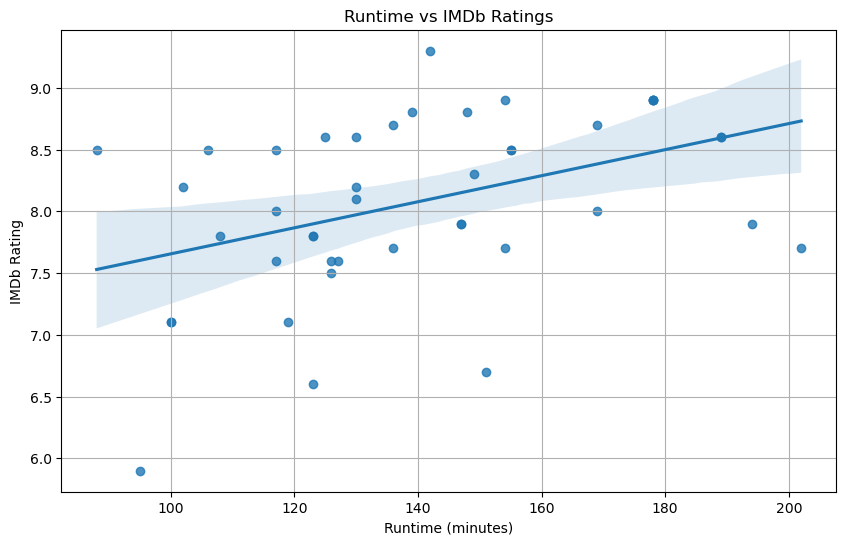

In [77]:
# Scatter plot with regression line for Runtime vs IMDb Ratings
plt.figure(figsize=(10, 6))
sns.regplot(x='Runtime', y='imdbRating', data=final_cleaned_data)
plt.title('Runtime vs IMDb Ratings')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

In [78]:
"""
The Pearson and Spearman correlation coefficients are 0.423 and 0.478, respectively, with corresponding p-values of 0.004 and 0.001. 
These results indicate a statistically significant positive correlation between runtime and IMDb ratings. 
The OLS regression analysis further supports this with an R-squared value of 0.179, suggesting that runtime explains 17.9% of the variance in IMDb ratings. 
The p-value for the runtime coefficient in the regression model is 0.004, which is statistically significant. 
Therefore, we reject the null hypothesis and conclude that there is a significant positive relationship between movie runtime and IMDb ratings. 
Longer movies tend to have higher IMDb ratings.
"""

'\nThe Pearson and Spearman correlation coefficients are 0.423 and 0.478, respectively, with corresponding p-values of 0.004 and 0.001. \nThese results indicate a statistically significant positive correlation between runtime and IMDb ratings. \nThe OLS regression analysis further supports this with an R-squared value of 0.179, suggesting that runtime explains 17.9% of the variance in IMDb ratings. \nThe p-value for the runtime coefficient in the regression model is 0.004, which is statistically significant. \nTherefore, we reject the null hypothesis and conclude that there is a significant positive relationship between movie runtime and IMDb ratings. \nLonger movies tend to have higher IMDb ratings.\n'

# Hypothesis 6 : Hypothesis for Actors & Directors

In [79]:
# Initialize dictionaries to accumulate earnings and ratings
actor_earnings = defaultdict(list)
actor_ratings = defaultdict(list)
director_earnings = defaultdict(list)
director_ratings = defaultdict(list)

In [80]:
# Accumulate box office and ratings for each actor and director
for index, row in final_cleaned_data.iterrows():
    actors = row['Actors'].split(', ')
    director = row['Director']
    box_office = row['BoxOffice']
    imdb_rating = row['imdbRating']
    
    for actor in actors:
        actor_earnings[actor].append(box_office)
        actor_ratings[actor].append(imdb_rating)
    
    director_earnings[director].append(box_office)
    director_ratings[director].append(imdb_rating)

In [81]:
# Compute average earnings and ratings for each actor and director
actor_avg_earnings = {actor: sum(earnings)/len(earnings) for actor, earnings in actor_earnings.items()}
actor_avg_ratings = {actor: sum(ratings)/len(ratings) for actor, ratings in actor_ratings.items()}
director_avg_earnings = {director: sum(earnings)/len(earnings) for director, earnings in director_earnings.items()}
director_avg_ratings = {director: sum(ratings)/len(ratings) for director, ratings in director_ratings.items()}

In [82]:
# Define thresholds 
earnings_threshold = 3.5e8  
ratings_threshold = 8.5  

In [83]:
# Identify high-profile actors and acclaimed directors
high_profile_actors = [actor for actor, avg in actor_avg_earnings.items() if avg > earnings_threshold or actor_avg_ratings[actor] > ratings_threshold]
acclaimed_directors = [director for director, avg in director_avg_earnings.items() if avg > earnings_threshold or director_avg_ratings[director] > ratings_threshold]

print("High-profile actors identified:", high_profile_actors)
print("Acclaimed directors identified:", acclaimed_directors)

High-profile actors identified: ['Edward Norton', 'Meat Loaf', 'Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain', 'Elijah Wood', 'Ian McKellen', 'Orlando Bloom', 'Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', 'Tom Hanks', 'Michael Clarke Duncan', 'David Morse', 'Matthew Broderick', 'Jeremy Irons', 'James Earl Jones', 'Daniel Radcliffe', 'Emma Watson', 'Rupert Grint', 'James Stewart', 'Donna Reed', 'Lionel Barrymore', 'Daveigh Chase', 'Suzanne Pleshette', 'Miyu Irino', 'John Travolta', 'Uma Thurman', 'Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Elliot Page', 'Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'Kate Winslet', 'Billy Zane']
Acclaimed directors identified: ['David Fincher', 'Christopher Nolan', 'Peter Jackson', 'Lana Wachowski, Lilly Wachowski', 'Frank Darabont', 'Roger Allers, Rob Minkoff', 'David Yates', 'Frank Capra', 'Hayao Miyazaki', 'Quentin Tarantino', 'Joseph Kosinski', 'James Cameron']


In [84]:
# Lists of high-profile actors and acclaimed directors
high_profile_actors = [
    'Edward Norton', 'Meat Loaf', 'Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain', 'Elijah Wood', 
    'Ian McKellen', 'Orlando Bloom', 'Keanu Reeves', 'Laurence Fishburne', 'Carrie-Anne Moss', 'Tom Hanks', 
    'Michael Clarke Duncan', 'David Morse', 'Matthew Broderick', 'Jeremy Irons', 'James Earl Jones', 'Daniel Radcliffe', 
    'Emma Watson', 'Rupert Grint', 'James Stewart', 'Donna Reed', 'Lionel Barrymore', 'Daveigh Chase', 'Suzanne Pleshette', 
    'Miyu Irino', 'John Travolta', 'Uma Thurman', 'Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Leonardo DiCaprio', 
    'Joseph Gordon-Levitt', 'Elliot Page', 'Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'Kate Winslet', 'Billy Zane']

acclaimed_directors = [
    'David Fincher', 'Christopher Nolan', 'Peter Jackson', 'Lana Wachowski, Lilly Wachowski', 'Frank Darabont', 
    'Roger Allers, Rob Minkoff', 'David Yates', 'Frank Capra', 'Hayao Miyazaki', 'Quentin Tarantino', 'Joseph Kosinski', 
    'James Cameron'
]

In [85]:
# Identify presence of high-profile actors and acclaimed directors
final_cleaned_data['HighProfileActor'] = final_cleaned_data['Actors'].apply(
    lambda x: any(actor in x for actor in high_profile_actors)
)
final_cleaned_data['AcclaimedDirector'] = final_cleaned_data['Director'].apply(
    lambda x: any(director in x for director in acclaimed_directors)
)

# T-tests for box office earnings and IMDb ratings
box_office_test = stats.ttest_ind(
    final_cleaned_data[final_cleaned_data['HighProfileActor']]['BoxOffice'],
    final_cleaned_data[~final_cleaned_data['HighProfileActor']]['BoxOffice'],
    equal_var=False  # Use Welch's t-test if variance is unequal
)

imdb_rating_test = stats.ttest_ind(
    final_cleaned_data[final_cleaned_data['HighProfileActor']]['imdbRating'],
    final_cleaned_data[~final_cleaned_data['HighProfileActor']]['imdbRating'],
    equal_var=False
)

print(f"Box Office T-test (High Profile Actors): {box_office_test}")
print(f"IMDb Rating T-test (High Profile Actors): {imdb_rating_test}")

Box Office T-test (High Profile Actors): TtestResult(statistic=2.913727196952573, pvalue=0.008492055104968952, df=20.32042718726053)
IMDb Rating T-test (High Profile Actors): TtestResult(statistic=6.6952357258949355, pvalue=5.218592609788046e-08, df=39.630597667251344)


In [86]:
# Repeat T-tests for acclaimed directors
box_office_test_directors = stats.ttest_ind(
    final_cleaned_data[final_cleaned_data['AcclaimedDirector']]['BoxOffice'],
    final_cleaned_data[~final_cleaned_data['AcclaimedDirector']]['BoxOffice'],
    equal_var=False
)

imdb_rating_test_directors = stats.ttest_ind(
    final_cleaned_data[final_cleaned_data['AcclaimedDirector']]['imdbRating'],
    final_cleaned_data[~final_cleaned_data['AcclaimedDirector']]['imdbRating'],
    equal_var=False
)

print(f"Box Office T-test (Acclaimed Directors): {box_office_test_directors}")
print(f"IMDb Rating T-test (Acclaimed Directors): {imdb_rating_test_directors}")

Box Office T-test (Acclaimed Directors): TtestResult(statistic=2.913727196952573, pvalue=0.008492055104968952, df=20.32042718726053)
IMDb Rating T-test (Acclaimed Directors): TtestResult(statistic=6.6952357258949355, pvalue=5.218592609788046e-08, df=39.630597667251344)


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

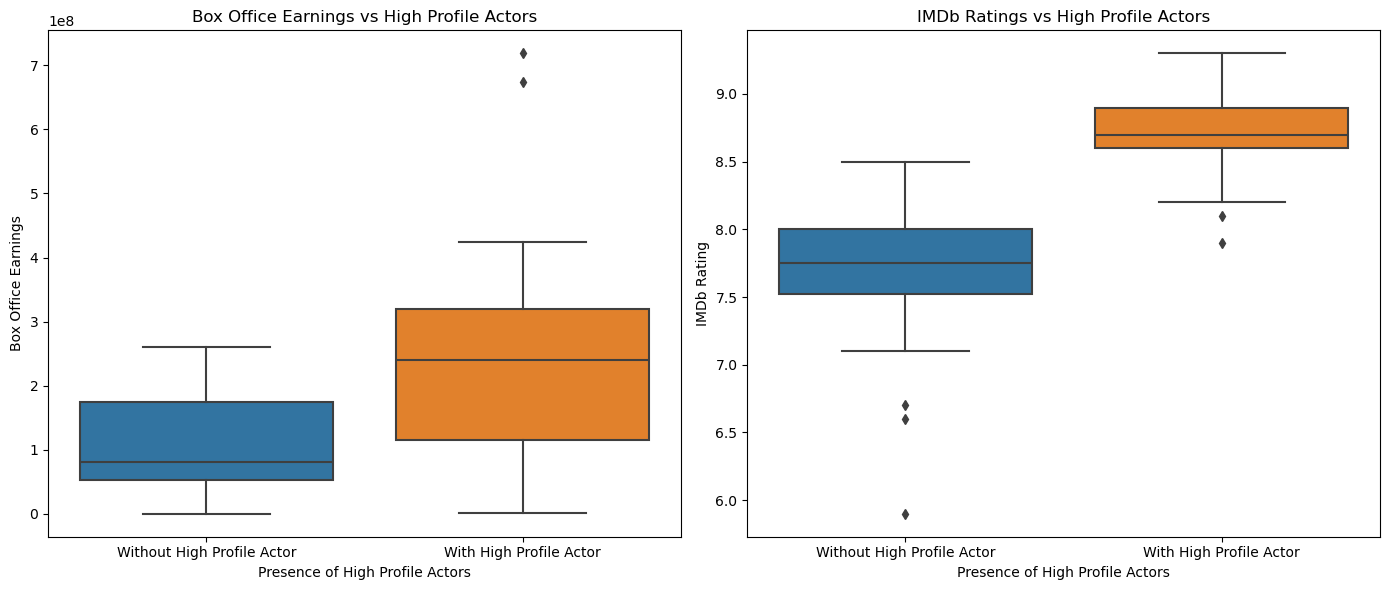

In [87]:
# Set up the plotting area
plt.figure(figsize=(14, 6))

# Box Plot for Box Office
plt.subplot(1, 2, 1)
sns.boxplot(x='HighProfileActor', y='BoxOffice', data=final_cleaned_data)
plt.title('Box Office Earnings vs High Profile Actors')
plt.xticks([0, 1], ['Without High Profile Actor', 'With High Profile Actor'])
plt.ylabel('Box Office Earnings')
plt.xlabel('Presence of High Profile Actors')

# Box Plot for IMDb Ratings
plt.subplot(1, 2, 2)
sns.boxplot(x='HighProfileActor', y='imdbRating', data=final_cleaned_data)
plt.title('IMDb Ratings vs High Profile Actors')
plt.xticks([0, 1], ['Without High Profile Actor', 'With High Profile Actor'])
plt.ylabel('IMDb Rating')
plt.xlabel('Presence of High Profile Actors')

plt.tight_layout()
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

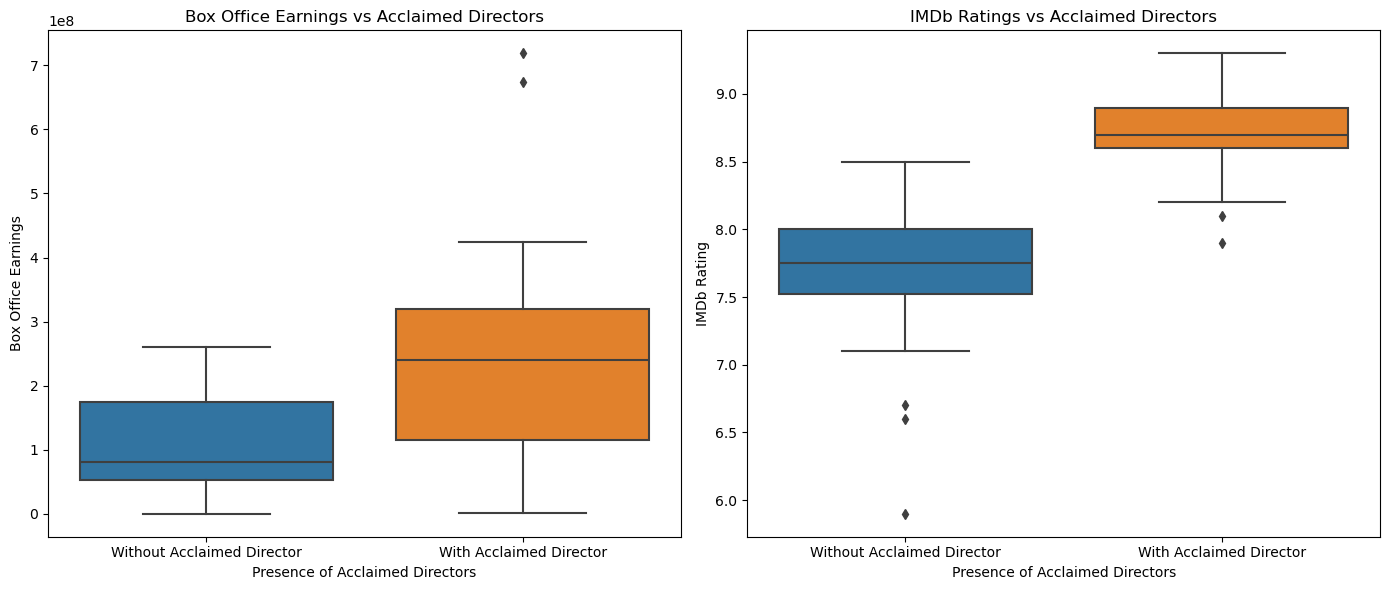

In [88]:
# Set up the plotting area for Directors' impact
plt.figure(figsize=(14, 6))

# Box Plot for Box Office based on Acclaimed Directors
plt.subplot(1, 2, 1)
sns.boxplot(x='AcclaimedDirector', y='BoxOffice', data=final_cleaned_data)
plt.title('Box Office Earnings vs Acclaimed Directors')
plt.xticks([0, 1], ['Without Acclaimed Director', 'With Acclaimed Director'])
plt.ylabel('Box Office Earnings')
plt.xlabel('Presence of Acclaimed Directors')

# Box Plot for IMDb Ratings based on Acclaimed Directors
plt.subplot(1, 2, 2)
sns.boxplot(x='AcclaimedDirector', y='imdbRating', data=final_cleaned_data)
plt.title('IMDb Ratings vs Acclaimed Directors')
plt.xticks([0, 1], ['Without Acclaimed Director', 'With Acclaimed Director'])
plt.ylabel('IMDb Rating')
plt.xlabel('Presence of Acclaimed Directors')

plt.tight_layout()
plt.show()

In [89]:
"""
The analysis reveals that both high-profile actors and acclaimed directors are associated with significantly higher box office 
earnings and IMDb ratings. This suggests that the presence of well-known talent, whether in acting or directing, 
has a positive impact on a movie's financial and critical success. The findings can be useful for film producers and 
studios when making decisions about casting and directing, as investing in high-profile actors and acclaimed directors 
can potentially yield better financial returns and critical acclaim.
"""

"\nThe analysis reveals that both high-profile actors and acclaimed directors are associated with significantly higher box office \nearnings and IMDb ratings. This suggests that the presence of well-known talent, whether in acting or directing, \nhas a positive impact on a movie's financial and critical success. The findings can be useful for film producers and \nstudios when making decisions about casting and directing, as investing in high-profile actors and acclaimed directors \ncan potentially yield better financial returns and critical acclaim.\n"

# Hypothesis 8 : Movies released during peak seasons like summer or holidays tend to perform better due to higher audience turnout.

T-test result: t-statistic = 1.6598394288401646, p-value = 0.1040907312186841


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


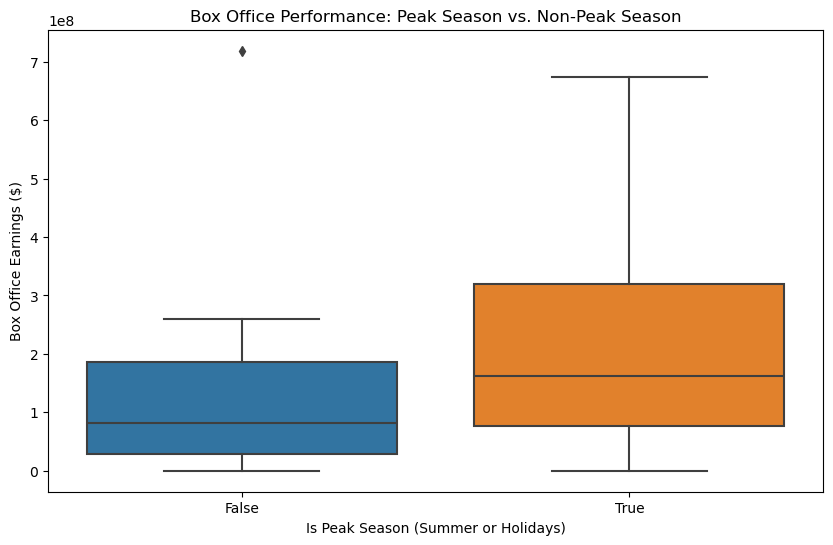

In [90]:
# Convert the 'Released' column to datetime
survey_data['Released'] = pd.to_datetime(survey_data['Released'], format='%d %b %Y', errors='coerce')

# Define peak seasons (summer: June, July, August; holidays: December)
def is_peak_season(date):
    if pd.isnull(date):
        return False
    return date.month in [6, 7, 8, 12]

survey_data['IsPeakSeason'] = survey_data['Released'].apply(is_peak_season)

# Remove entries with 'N/A' or missing BoxOffice values
survey_data['BoxOffice'] = survey_data['BoxOffice'].replace('N/A', np.nan)
survey_data['BoxOffice'] = survey_data['BoxOffice'].apply(lambda x: int(x.replace('$', '').replace(',', '')) if pd.notnull(x) else np.nan)
cleaned_data = survey_data.dropna(subset=['BoxOffice'])

# T-test for box office performance
peak_season_box_office = cleaned_data[cleaned_data['IsPeakSeason']]['BoxOffice']
non_peak_season_box_office = cleaned_data[~cleaned_data['IsPeakSeason']]['BoxOffice']

t_stat, p_value = stats.ttest_ind(peak_season_box_office, non_peak_season_box_office, equal_var=False)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsPeakSeason', y='BoxOffice', data=cleaned_data)
plt.title('Box Office Performance: Peak Season vs. Non-Peak Season')
plt.xlabel('Is Peak Season (Summer or Holidays)')
plt.ylabel('Box Office Earnings ($)')
plt.show()

C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


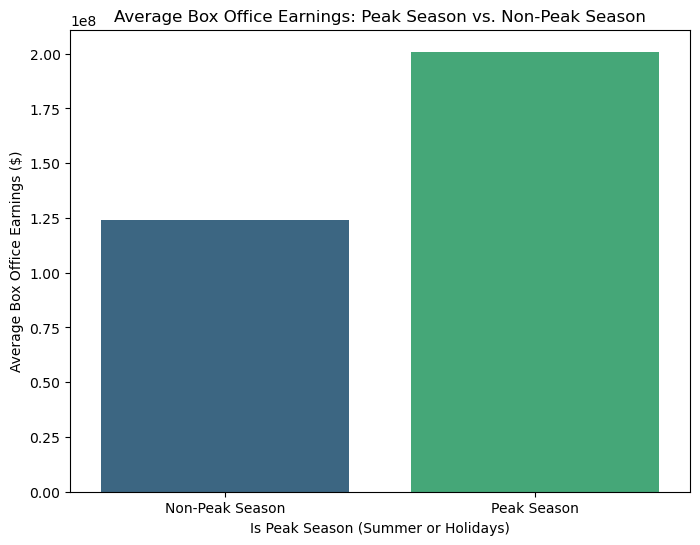

In [91]:
# Calculate average box office earnings for peak and non-peak seasons
average_earnings = cleaned_data.groupby('IsPeakSeason')['BoxOffice'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='IsPeakSeason', y='BoxOffice', data=average_earnings, palette='viridis')
plt.title('Average Box Office Earnings: Peak Season vs. Non-Peak Season')
plt.xlabel('Is Peak Season (Summer or Holidays)')
plt.ylabel('Average Box Office Earnings ($)')
plt.xticks([0, 1], ['Non-Peak Season', 'Peak Season'])
plt.show()

In [92]:
"""
Based on the T-test, there is no statistically significant evidence to support the hypothesis that movies released during 
peak seasons (summer and holidays) have higher box office revenues compared to those released in non-peak seasons. 
However, this does not conclusively prove that seasonality has no effect; it only indicates that, in this dataset, 
the evidence is not strong enough to confirm a significant impact. Further research with a larger or more varied dataset might
be necessary to draw more definitive conclusions.

Visual Observation: The bar chart suggests a difference in box office revenue between peak and non-peak seasons.
Statistical Test Result: The T-test did not find this difference to be statistically significant at a conventional level (e.g., p < 0.05).

In this case, the data suggest a potential trend, but we do not have enough statistical evidence to confirm that this 
trend is not due to random variation. This might be due to factors like the size of the dataset, variability within groups, 
or other unmeasured factors affecting box office revenue.

Further analysis with more data or additional controls could provide a clearer answer.
"""

'\nBased on the T-test, there is no statistically significant evidence to support the hypothesis that movies released during \npeak seasons (summer and holidays) have higher box office revenues compared to those released in non-peak seasons. \nHowever, this does not conclusively prove that seasonality has no effect; it only indicates that, in this dataset, \nthe evidence is not strong enough to confirm a significant impact. Further research with a larger or more varied dataset might\nbe necessary to draw more definitive conclusions.\n\nVisual Observation: The bar chart suggests a difference in box office revenue between peak and non-peak seasons.\nStatistical Test Result: The T-test did not find this difference to be statistically significant at a conventional level (e.g., p < 0.05).\n\nIn this case, the data suggest a potential trend, but we do not have enough statistical evidence to confirm that this \ntrend is not due to random variation. This might be due to factors like the size o